<a href="https://colab.research.google.com/github/Himanshucode77/Case_Study/blob/main/Jamboree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jamboree**

---


Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# **Business Problem**

---

This analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df.drop(['Serial No.'], axis = 1, inplace = True)
df_lr = df.copy()
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# **DataSet**

---

In the dataset we have data pertaining to GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA and research imapct the chances of admit in a student.

# **Features**

---


1. **GRE Scores** (out of 340) : Score in GRE exam.
3. **TOEFL Scores** (out of 120) : Score in TOEFL exam.
4. **University Rating** (out of 5) : Rating of the college/university student graduated from.
5. **Statement of Purpose** (out of 5) : score of the SOP
5. **Letter of Recommendation Strength** (out of 5) : Score of the LOR
6. **Undergraduate GPA** (out of 10) : Score in college/university UG exam.
7. **Research Experience** (either 0 or 1) : whether student has research experience or not.
8. **Chance of Admit** (ranging from 0 to 1) : target feature- gives percentage chance of Admit.


In [ ]:
df.shape

(500, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

***So, as we can see, there are nulls in our dataset. Now we will be checking what kind of data we have in our dataframe in the individual features. It will help us have a sense of the data we are dealing with.***

In [ ]:
for column in df:
  print('\033[1;4m' + column + '\033[0m', end= ':- No. of Unique Values: ')
  print(df[column].nunique(), end= ';  Unique Values: ')
  if df[column].nunique() <= 50: 
    print(df[column].unique())
  else:
    print(df[column].unique()[1:50], end='... and some more values')
  print()

GRE Score:- No. of Unique Values: 49;  Unique Values: [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]

TOEFL Score:- No. of Unique Values: 29;  Unique Values: [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]

University Rating:- No. of Unique Values: 5;  Unique Values: [4 3 2 5 1]

SOP:- No. of Unique Values: 9;  Unique Values: [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]

LOR :- No. of Unique Values: 9;  Unique Values: [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]

CGPA:- No. of Unique Values: 184;  Unique Values: [8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7  8.8
 8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7  9.3
 8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04 8.9
 8.56 8.72 8.22 7.54 7.36 8.02 9.36]... and some more values
R

***Checking for duplicates***

In [ ]:
duplicate = df[df.duplicated()]
 
print(duplicate)

Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


##```Observations```

---
 We have no duplicate record.

# ***Descriptive Statistics for Features***

---



In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df['SOP'].mode()

0    4.0
dtype: float64

In [ ]:
df['LOR '].mode()

0    3.0
dtype: float64

In [ ]:
df['Research'].mode()

0    1
dtype: int64

##```Observations```

---

1. **GRE Scores** :
  * Mean GRE Score is 316.47 with a standard deviation of 11.29.
  * minimum marks scored by student is 290.
  * maximum marks scored is 340.
3. **TOEFL Scores** :
  * Mean TOEFL Score is 107.19 with a standard deviation of 6.08.
  * minimum marks scored by student is 92.
  * maximum marks scored is 120.
4. **University Rating** :
  * Lowest rated university amongst the students is 1.
  * Highest rating is 5. 
5. **Statement of Purpose** :
  * Most of the students have a SOP marks of 4. 
  * The highest possible marks is 5 and lowest marks is 1.
5. **Letter of Recommendation Strength** :
  * Most of the students have a LOR marks of 3. 
  * The highest possible marks is 5 and lowest marks is 1.
6. **Undergraduate GPA** :
  * Mean CGPA Score is 8.57 with a standard deviation of 0.6.
  * minimum CGPA scored by student is 6.68.
  * maximum CGPA scored is 9.92.
7. **Research Experience** : Students with research experience forms the higher number.
8. **Chance of Admit** :
  * Mean percentage chance of admit amongst jamboree students is 72%.
  * minimum percentage chance of admit amongst jamboree students is 34%.
  * maximum percentage chance of admit amongst jamboree students is 97%.

# **Correlation**

---



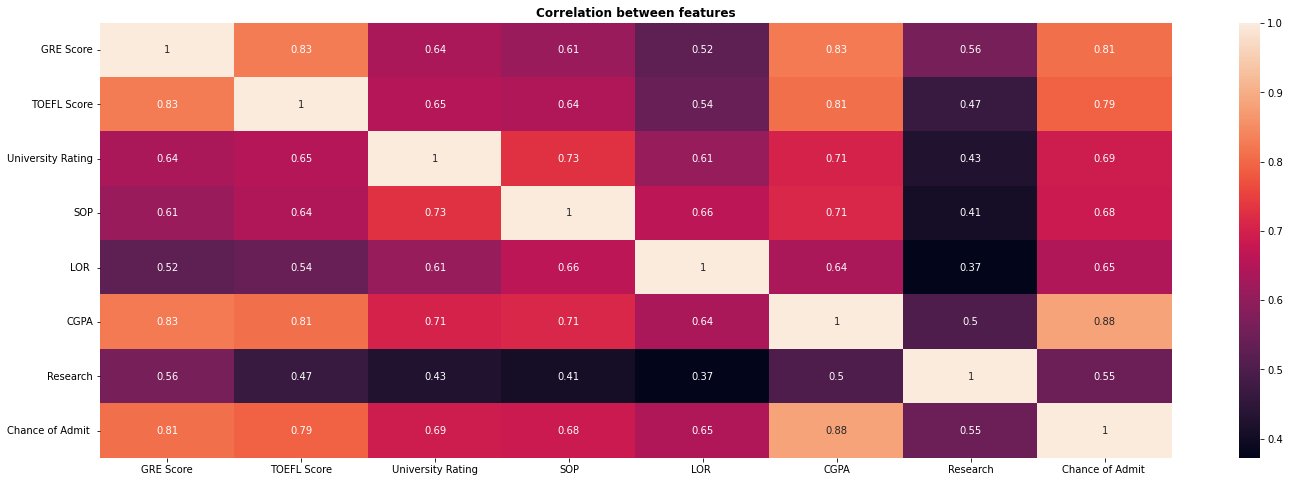

In [ ]:
plt.figure(figsize = (24,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between features',fontweight="bold")
plt.show()

##```Observations```

---
1. **Chance of admission is very highly correlated to GRE score, TOEFL score, and CGPA. (>0.75)**
2. Chance of admission is also moderately correlated to university rating, SOP and LOR. 
3. there is only a 0.55 correlation between research and chance of admission.

# **Outlier Detection and Handling**

---

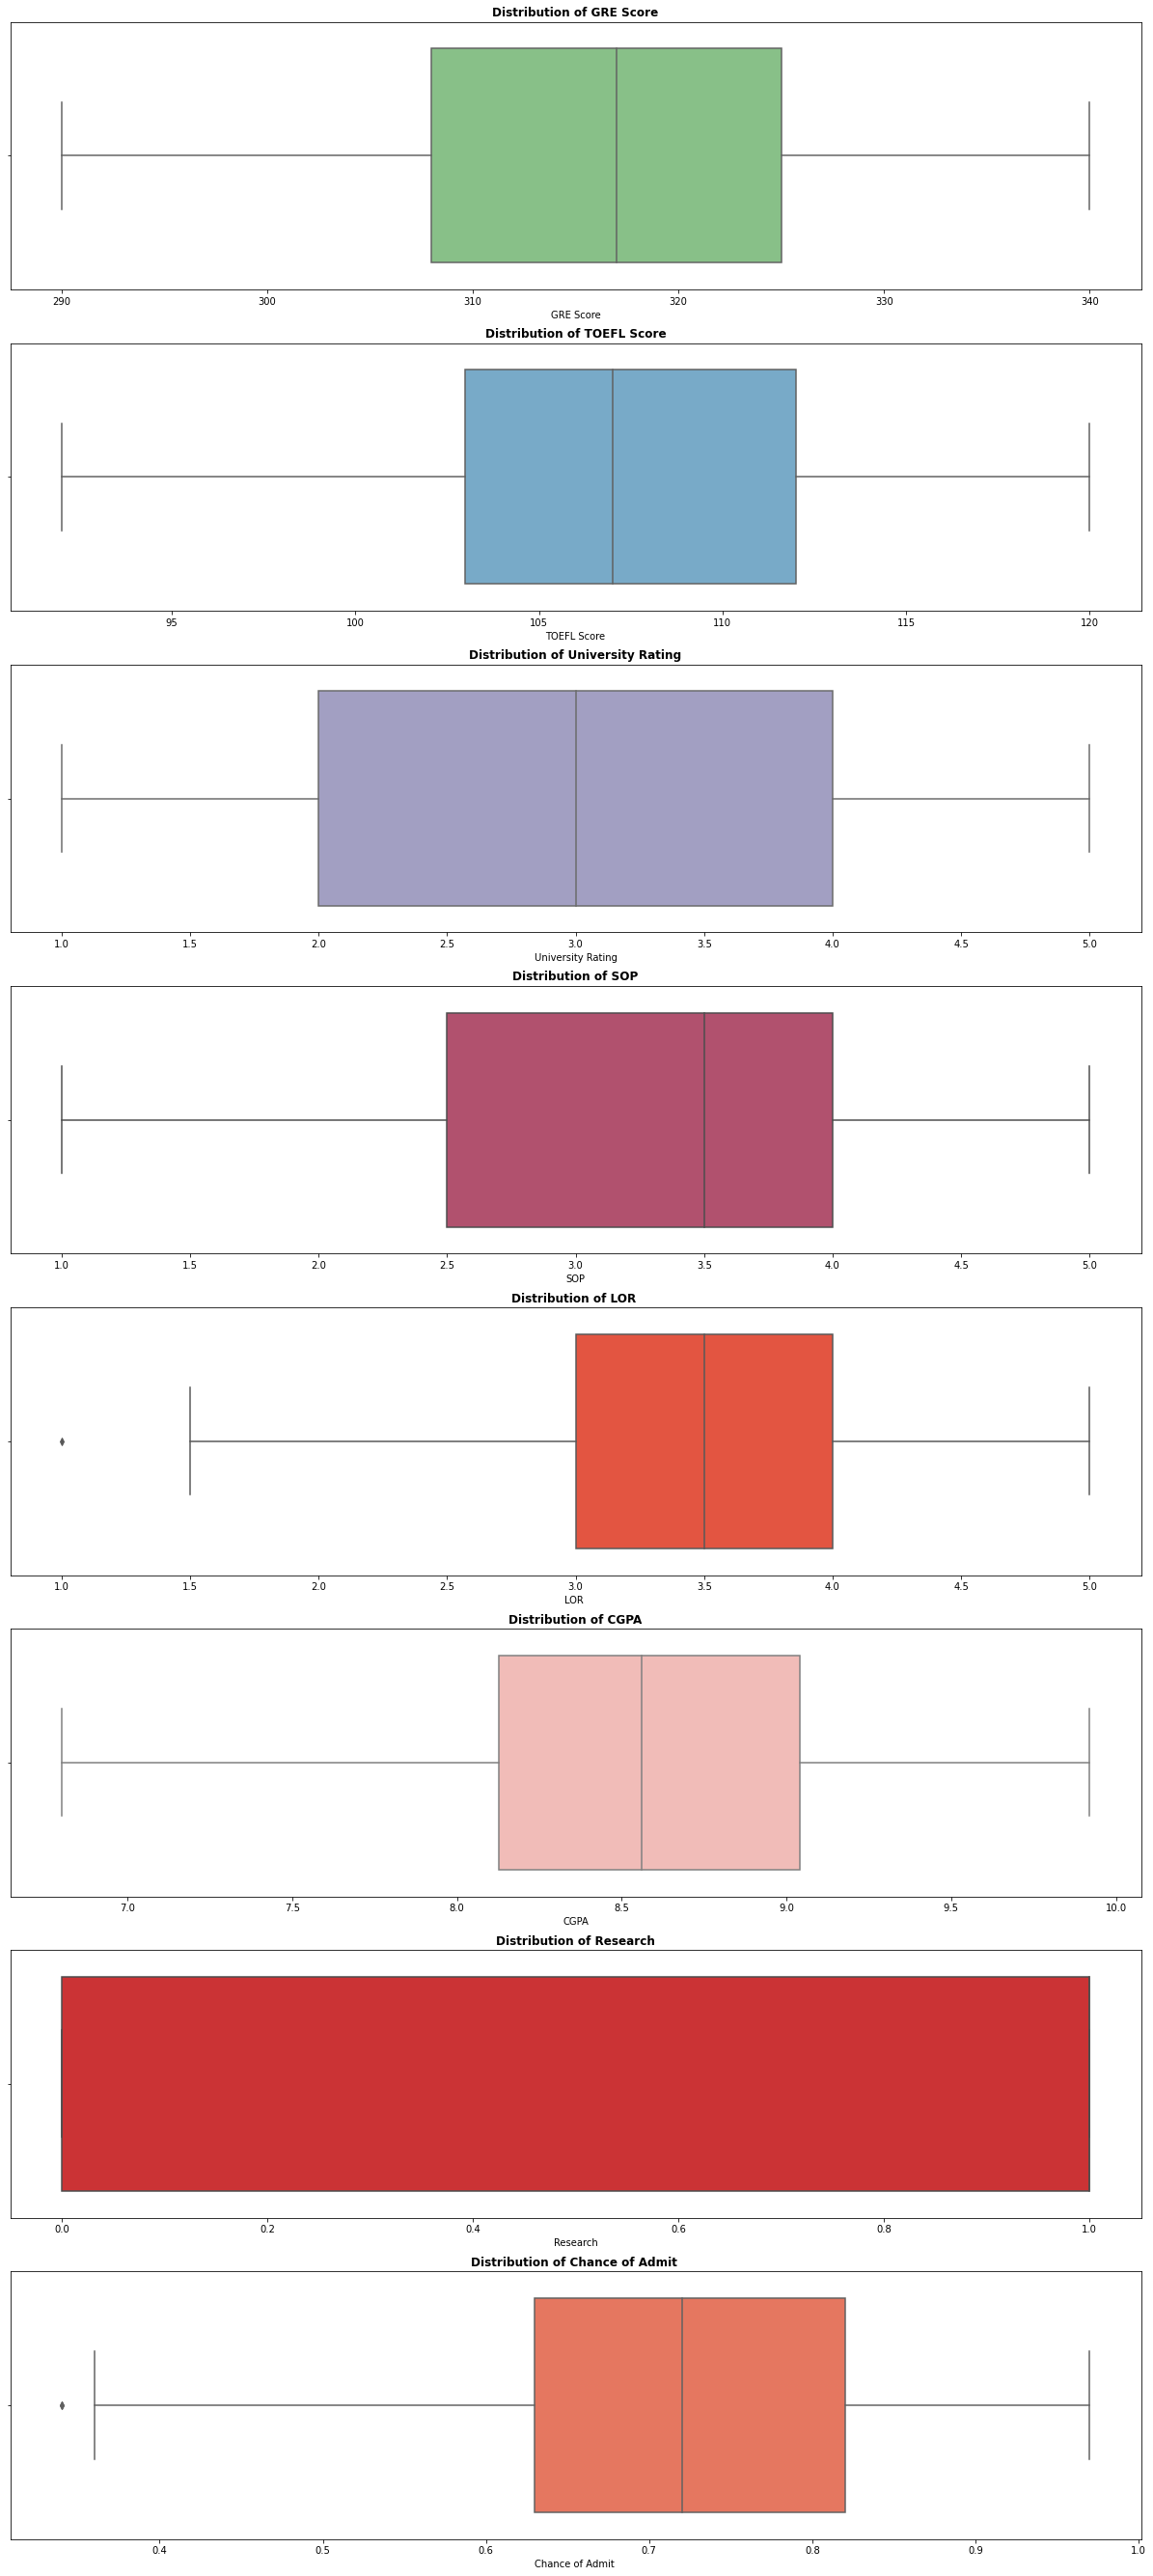

In [ ]:
plt.figure(figsize = (21,48))
p=['Accent', 'Blues', 'Purples','flare', 'CMRmap', 'Pastel1', 'Set1', 'Reds', 'gist_earth','gnuplot']
v_list =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']
for i in range(len(v_list)):
  plt.subplot(8,1,i+1)
  sns.boxplot(data=df, x=v_list[i], palette=p[i])
  plt.title(f"Distribution of {v_list[i]}",fontweight="bold")

##```Observations```

---

1. There are only a very few outliers 2 features- LOR and chance of admit.
2. Before creation our model We will be treating the outlier in LOR as this might impact our models.
3. I am not removing the outlier right now, because i want to see how it imapcts in out bivariate and multivariate analysis.


# **Feature creation**

---



In [ ]:
bins = [280, 300, 320,340]
labels =["low", "medium", "high"]
df['GRE_Score_catg'] = pd.cut(df['GRE Score'], bins, labels=labels)
bins = [90,100, 110, 120]
labels =["low", "medium", "high"]
df['TOEFL_Score_catg'] = pd.cut(df['TOEFL Score'], bins, labels=labels)
bins = [6,7.3,8.6,10]
labels =["low", "medium", "high"]
df['CGPA_catg'] = pd.cut(df['CGPA'], bins, labels=labels)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_Score_catg,TOEFL_Score_catg,CGPA_catg
0,337,118,4,4.5,4.5,9.65,1,0.92,high,high,high
1,324,107,4,4.0,4.5,8.87,1,0.76,high,medium,high
2,316,104,3,3.0,3.5,8.00,1,0.72,medium,medium,medium
3,322,110,3,3.5,2.5,8.67,1,0.80,high,medium,high
4,314,103,2,2.0,3.0,8.21,0,0.65,medium,medium,medium
...,...,...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,high,medium,high
496,337,117,5,5.0,5.0,9.87,1,0.96,high,high,high
497,330,120,5,4.5,5.0,9.56,1,0.93,high,high,high
498,312,103,4,4.0,5.0,8.43,0,0.73,medium,medium,medium


# **Univariate Analysis**

---



In [ ]:
df['University Rating'].value_counts(normalize = True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

In [ ]:
df['SOP'].value_counts(normalize = False)

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [ ]:
df['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

In [ ]:
df['Research'].value_counts(normalize = True)

1    0.56
0    0.44
Name: Research, dtype: float64

In [ ]:
df['GRE_Score_catg'].value_counts(normalize = True)

medium    0.500
high      0.394
low       0.106
Name: GRE_Score_catg, dtype: float64

In [ ]:
df['TOEFL_Score_catg'].value_counts(normalize = True)

medium    0.546
high      0.298
low       0.156
Name: TOEFL_Score_catg, dtype: float64

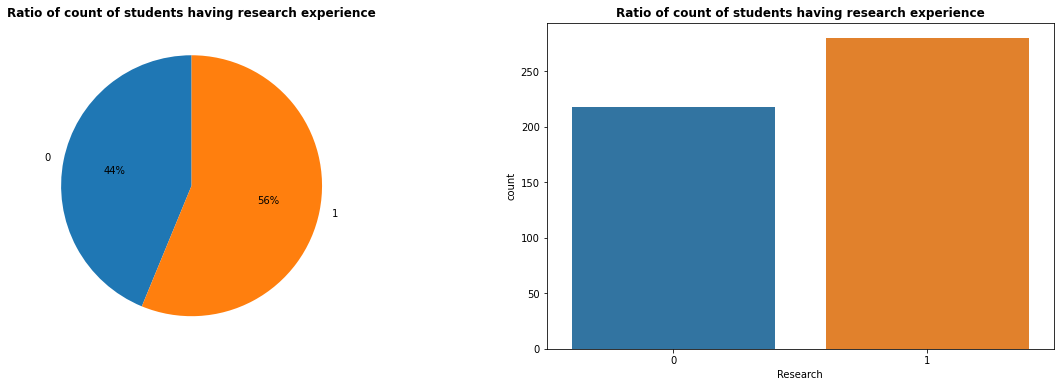

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
data=df.groupby(['Research'])['Research'].count()
plt.pie(data, labels=['0','1'], autopct='%.0f%%', startangle = 90)
plt.title('Ratio of count of students having research experience',fontweight="bold")
plt.subplot(1,2,2)
sns.countplot(data= df, x="Research")
plt.title('Ratio of count of students having research experience',fontweight="bold")
plt.show()

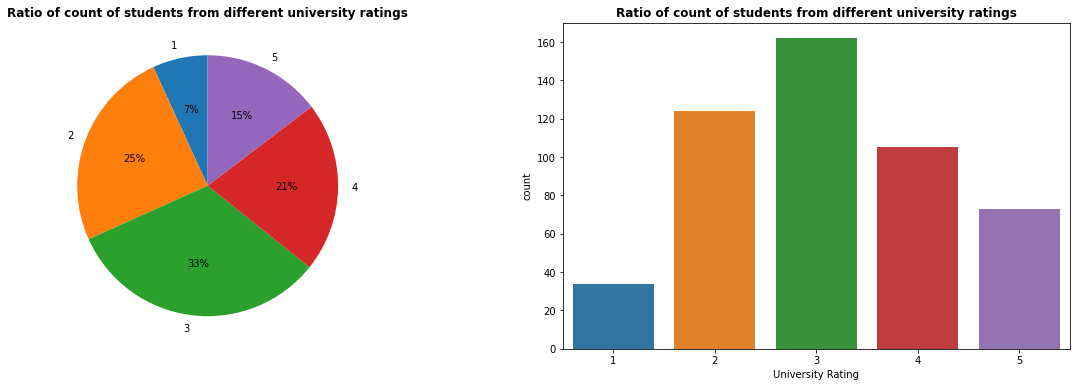

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
data=df.groupby(['University Rating'])['University Rating'].count()
plt.pie(data, labels=['1','2', '3','4','5'], autopct='%.0f%%', startangle = 90)
plt.title('Ratio of count of students from different university ratings',fontweight="bold")
plt.subplot(1,2,2)
sns.countplot(data= df, x="University Rating")
plt.title('Ratio of count of students from different university ratings',fontweight="bold")
plt.show()

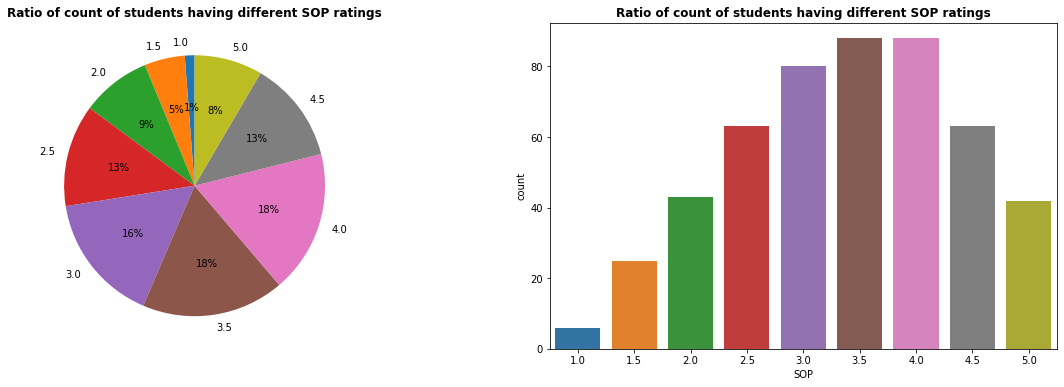

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
data=df.groupby(['SOP'])['SOP'].count()
plt.pie(data, labels=['1.0', '1.5', '2.0', '2.5', '3.0','3.5','4.0','4.5','5.0'], autopct='%.0f%%', startangle = 90)
plt.title('Ratio of count of students having different SOP ratings',fontweight="bold")
plt.subplot(1,2,2)
sns.countplot(data= df, x="SOP")
plt.title('Ratio of count of students having different SOP ratings',fontweight="bold")
plt.show()

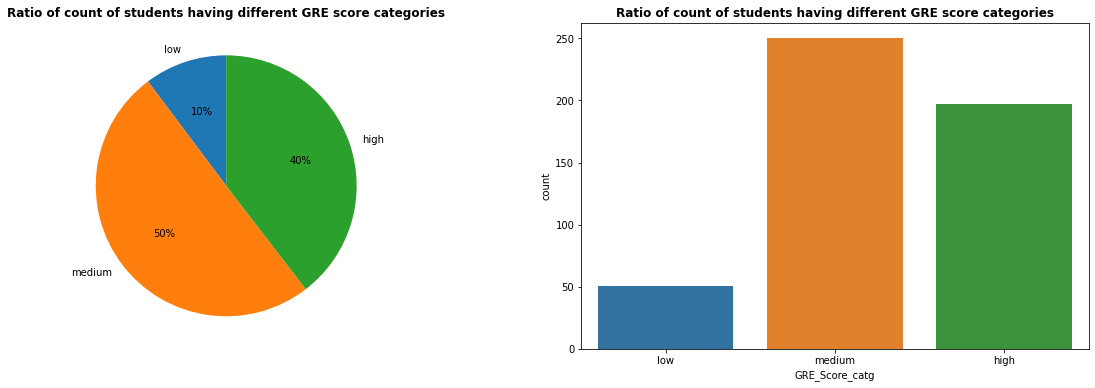

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
data=df.groupby(['GRE_Score_catg'])['GRE_Score_catg'].count()
plt.pie(data, labels=['low','medium','high'], autopct='%.0f%%', startangle = 90)
plt.title('Ratio of count of students having different GRE score categories',fontweight="bold")
plt.subplot(1,2,2)
sns.countplot(data= df, x="GRE_Score_catg")
plt.title('Ratio of count of students having different GRE score categories',fontweight="bold")
plt.show()

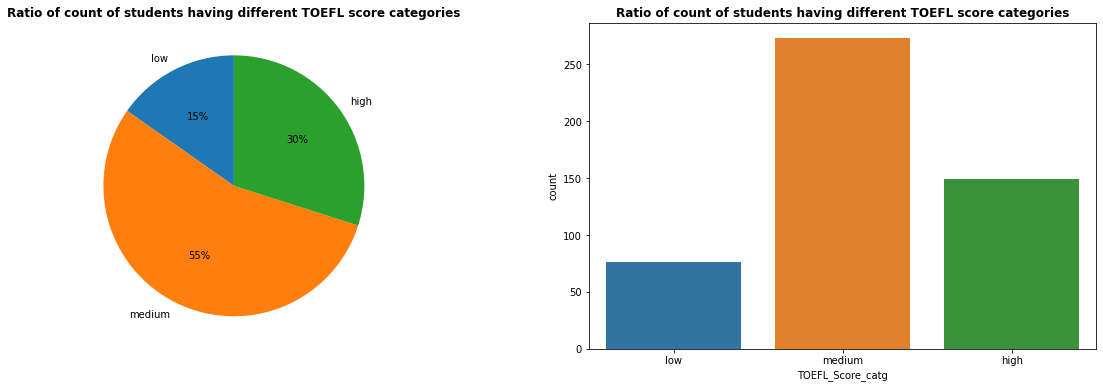

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
data=df.groupby(['TOEFL_Score_catg'])['TOEFL_Score_catg'].count()
plt.pie(data, labels=['low','medium','high'], autopct='%.0f%%', startangle = 90)
plt.title('Ratio of count of students having different TOEFL score categories',fontweight="bold")
plt.subplot(1,2,2)
sns.countplot(data= df, x="TOEFL_Score_catg")
plt.title('Ratio of count of students having different TOEFL score categories',fontweight="bold")
plt.show()

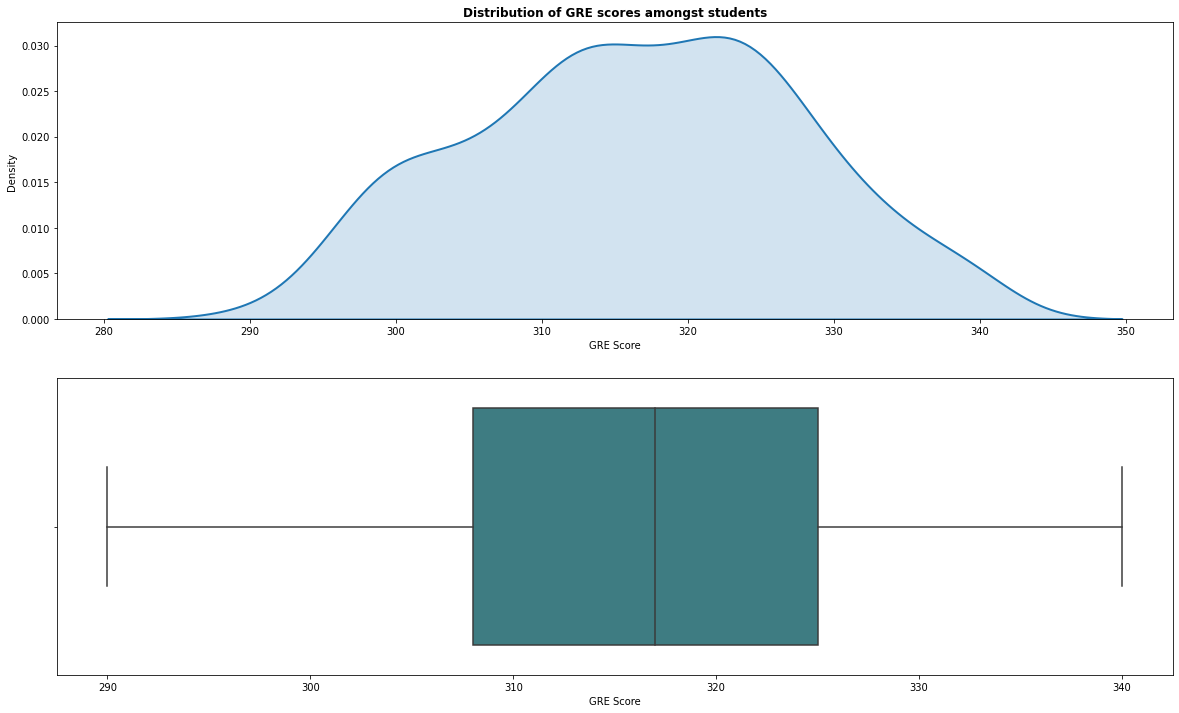

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
sns.kdeplot(data=df, x="GRE Score", fill=True, common_norm=False,  alpha=.2, linewidth=2, legend=True)
plt.title('Distribution of GRE scores amongst students',fontweight="bold")
plt.subplot(2,1,2)
sns.boxplot(data=df, x="GRE Score", palette='crest')
plt.show()

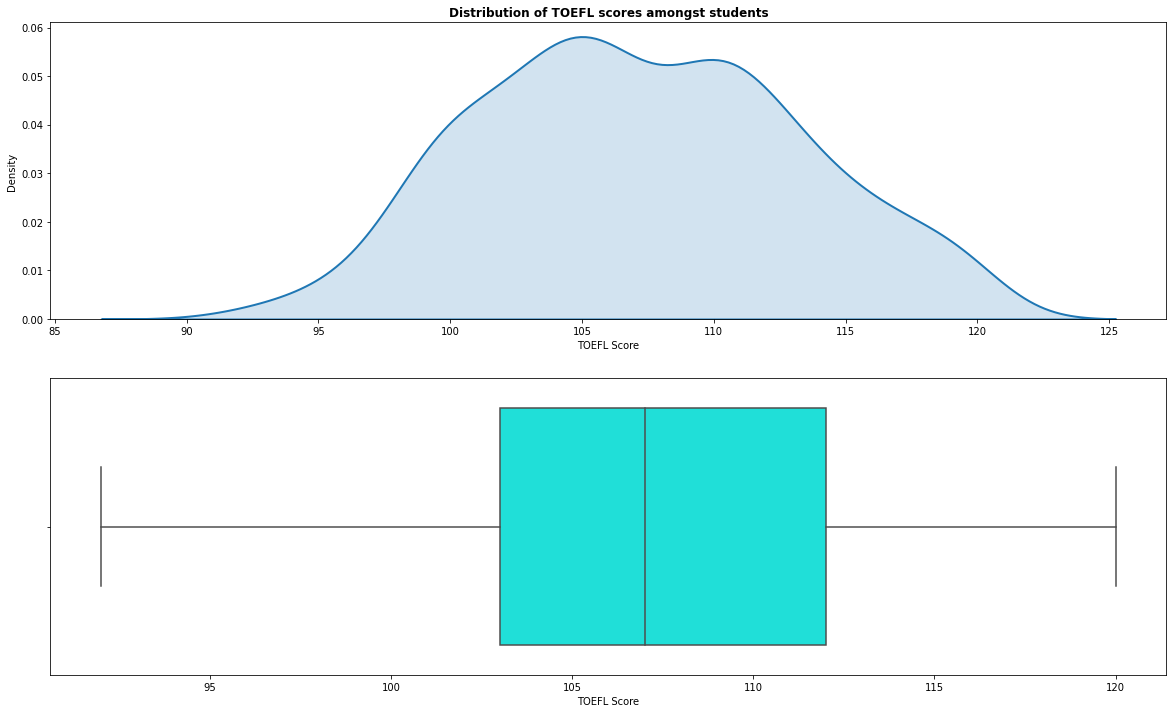

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
sns.kdeplot(data=df, x="TOEFL Score", fill=True, common_norm=False,  alpha=.2, linewidth=2, legend=True)
plt.title('Distribution of TOEFL scores amongst students',fontweight="bold")
plt.subplot(2,1,2)
sns.boxplot(data=df, x="TOEFL Score", palette='hsv')
plt.show()

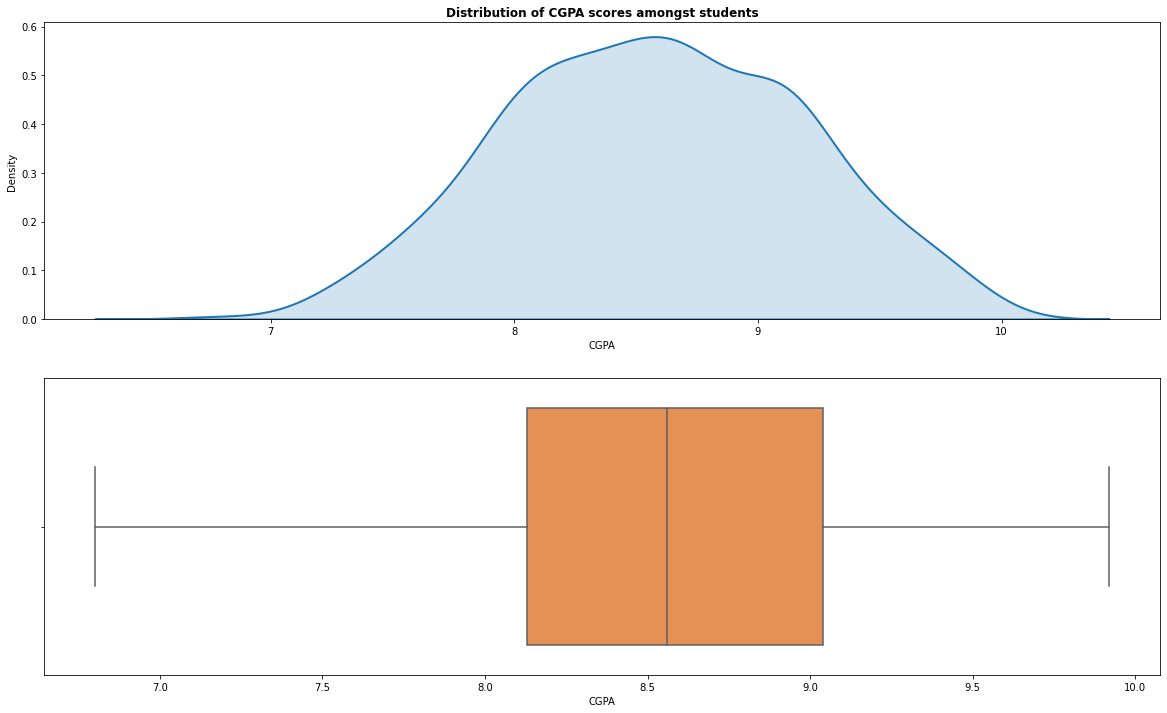

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
sns.kdeplot(data=df, x="CGPA", fill=True, common_norm=False,  alpha=.2, linewidth=2, legend=True)
plt.title('Distribution of CGPA scores amongst students',fontweight="bold")
plt.subplot(2,1,2)
sns.boxplot(data=df, x="CGPA",  palette='Oranges')
plt.show()

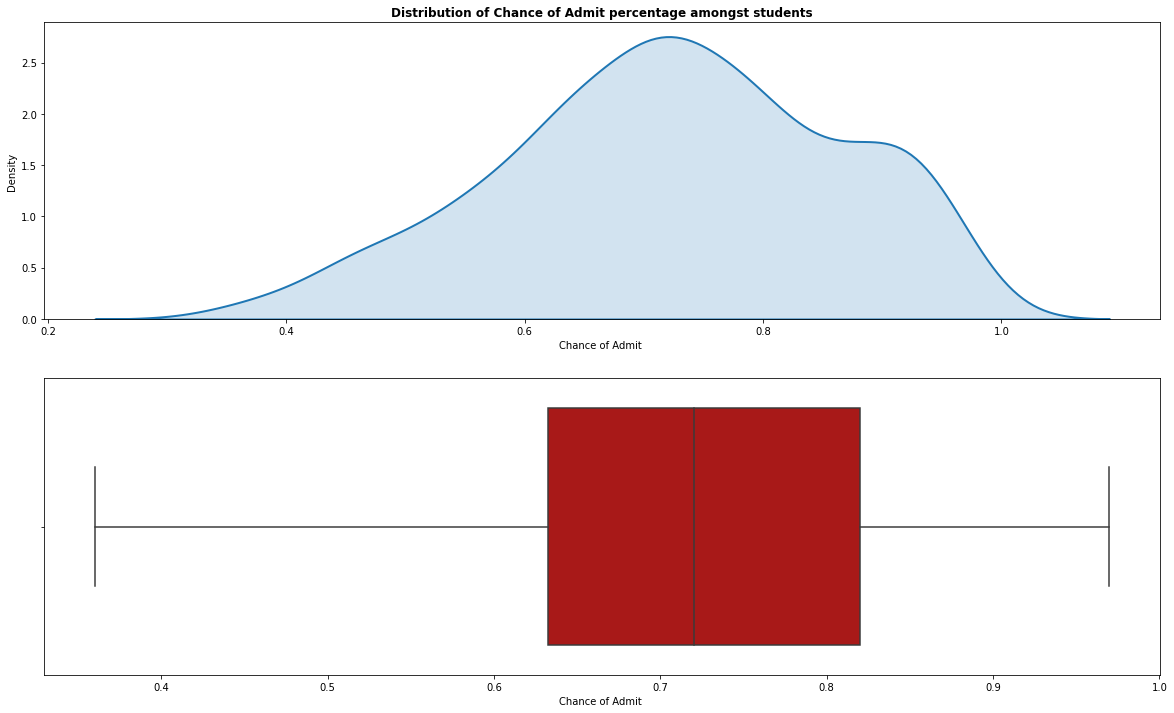

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
sns.kdeplot(data=df, x="Chance of Admit ", fill=True, common_norm=False,  alpha=.2, linewidth=2, legend=True)
plt.title('Distribution of Chance of Admit percentage amongst students',fontweight="bold")
plt.subplot(2,1,2)
sns.boxplot(data=df, x="Chance of Admit ", palette='gist_heat')
plt.show()

##```Observations```

---

1. **GRE Scores** :
  * 50% students have medium GRE scores.
  * 40% students have high GRE scores.
  * 10% students have low GRE scores.
	
3. **TOEFL Scores** :
  * 54% students have medium GRE scores.
  * 29% students have high GRE scores.
  * 15% students have low GRE scores.

4. **University Rating** :
  * 32% of the students belong from university level 3, 14% from univeristy level 5 and only 6% from university rating 1.
  * Highest rating is 5. 
5. **Statement of Purpose** :
  * 17% of the students have SOP rating of 3.0, 3.5 and 4.0. 
  * 8% students has a SOP rating of 5.
5. **Letter of Recommendation Strength** :
  * 19% of students have SOP rating of 3.0. 
  * 9% students have SOP rating of 5.
6. **Undergraduate GPA** :
  * Mean CGPA Score is 8.57 with a standard deviation of 0.6.
  * minimum CGPA scored by student is 6.68.
  * maximum CGPA scored is 9.92.
7. **Research Experience** : 56% of Students have research experience while 44% doesnt have research experience.
8. **Chance of Admit** :
  * Mean percentage chance of admit amongst jamboree students is 72%.
  * minimum percentage chance of admit amongst jamboree students is 34%.
  * maximum percentage chance of admit amongst jamboree students is 97%.

## **Bivariate Analysis**

---



In [ ]:
df.groupby(["Research"])['Chance of Admit '].mean()

Research
0    0.634909
1    0.789964
Name: Chance of Admit , dtype: float64

In [ ]:
df.groupby(["GRE_Score_catg"])['Chance of Admit '].mean()

GRE_Score_catg
low       0.533208
medium    0.666920
high      0.842030
Name: Chance of Admit , dtype: float64

In [ ]:
df.groupby(["TOEFL_Score_catg"])['Chance of Admit '].mean()

TOEFL_Score_catg
low       0.556154
medium    0.692491
high      0.862013
Name: Chance of Admit , dtype: float64

In [ ]:
df.groupby(["CGPA_catg"])['Chance of Admit '].mean()

CGPA_catg
low       0.490000
medium    0.625400
high      0.827531
Name: Chance of Admit , dtype: float64

In [ ]:
df.groupby(["University Rating"])['Chance of Admit '].mean()

University Rating
1    0.562059
2    0.626111
3    0.702901
4    0.801619
5    0.888082
Name: Chance of Admit , dtype: float64

In [ ]:
df.groupby(["SOP"])['Chance of Admit '].mean()

SOP
1.0    0.538333
1.5    0.546400
2.0    0.589535
2.5    0.645312
3.0    0.678500
3.5    0.712045
4.0    0.782809
4.5    0.850000
5.0    0.885000
Name: Chance of Admit , dtype: float64

In [ ]:
df.groupby(["LOR "])['Chance of Admit '].mean()

LOR 
1.0    0.420000
1.5    0.550000
2.0    0.568261
2.5    0.640600
3.0    0.668485
3.5    0.723023
4.0    0.764149
4.5    0.831905
5.0    0.872600
Name: Chance of Admit , dtype: float64

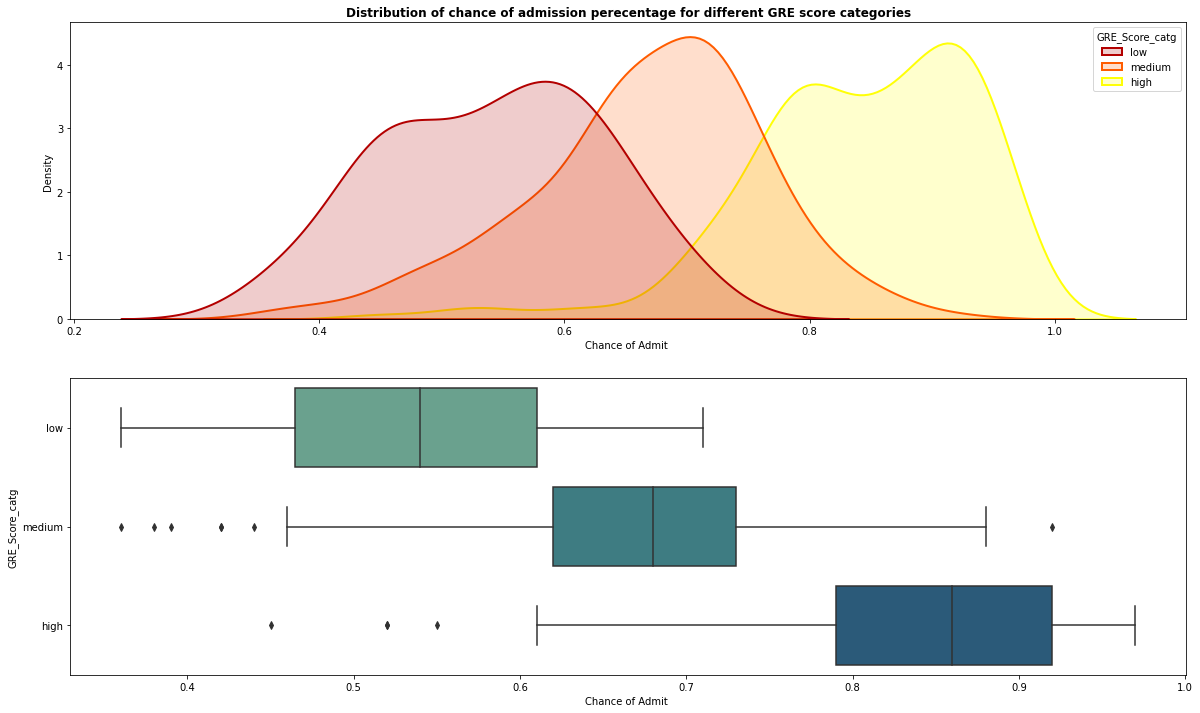

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
sns.kdeplot(data=df, x="Chance of Admit ", hue='GRE_Score_catg', fill=True, common_norm=False, palette='hot', alpha=.2, linewidth=2, legend=True)
plt.title('Distribution of chance of admission perecentage for different GRE score categories',fontweight="bold")
plt.subplot(2,1,2)
sns.boxplot(data=df, x="Chance of Admit ", y='GRE_Score_catg', palette='crest')
plt.show()

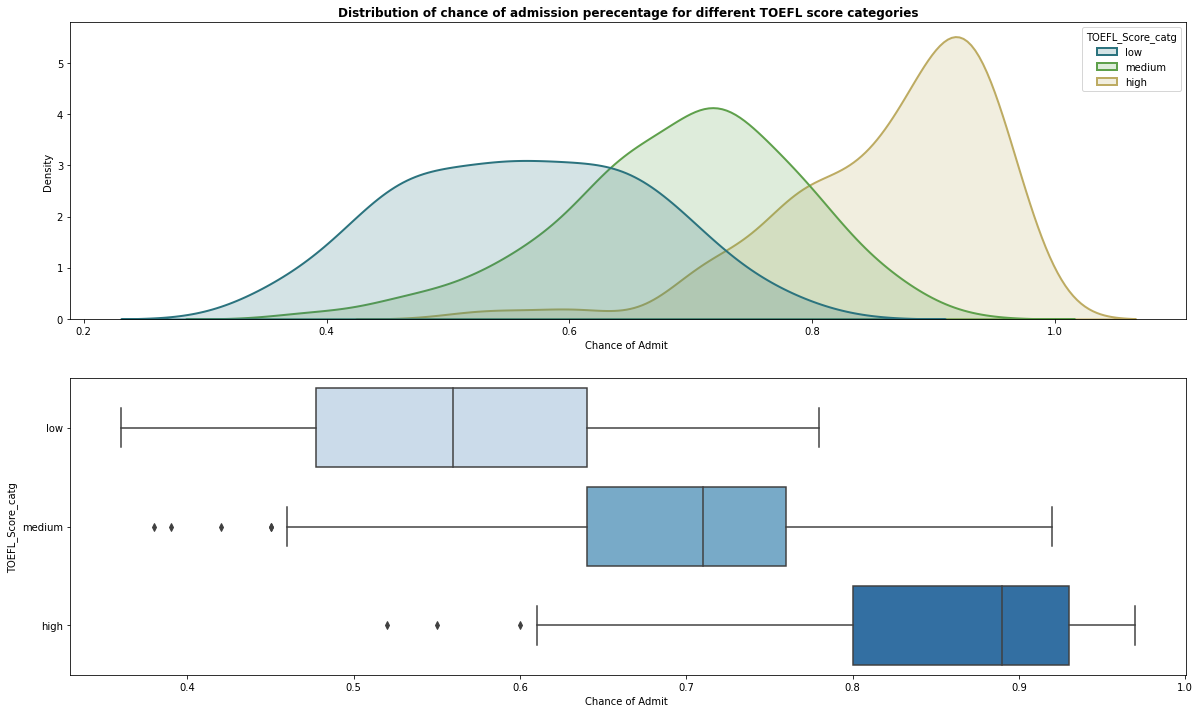

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
sns.kdeplot(data=df, x="Chance of Admit ", hue='TOEFL_Score_catg', fill=True, common_norm=False, palette='gist_earth', alpha=.2, linewidth=2, legend=True)
plt.title('Distribution of chance of admission perecentage for different TOEFL score categories',fontweight="bold")
plt.subplot(2,1,2)
sns.boxplot(data=df, x="Chance of Admit ", y='TOEFL_Score_catg', palette='Blues')
plt.show()

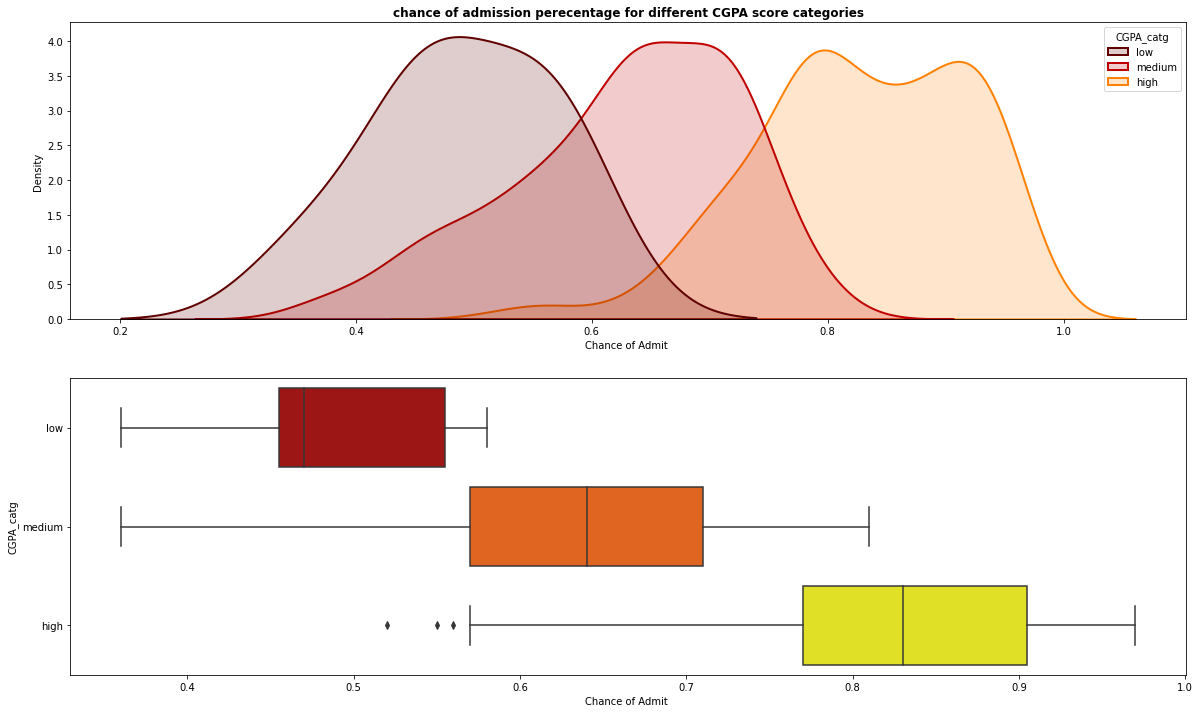

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(2,1,1)
sns.kdeplot(data=df, x="Chance of Admit ", hue='CGPA_catg', fill=True, common_norm=False, palette='gist_heat', alpha=.2, linewidth=2, legend=True)
plt.title('chance of admission perecentage for different CGPA score categories',fontweight="bold")
plt.subplot(2,1,2)
sns.boxplot(data=df, x="Chance of Admit ", y='CGPA_catg', palette='hot')
plt.show()

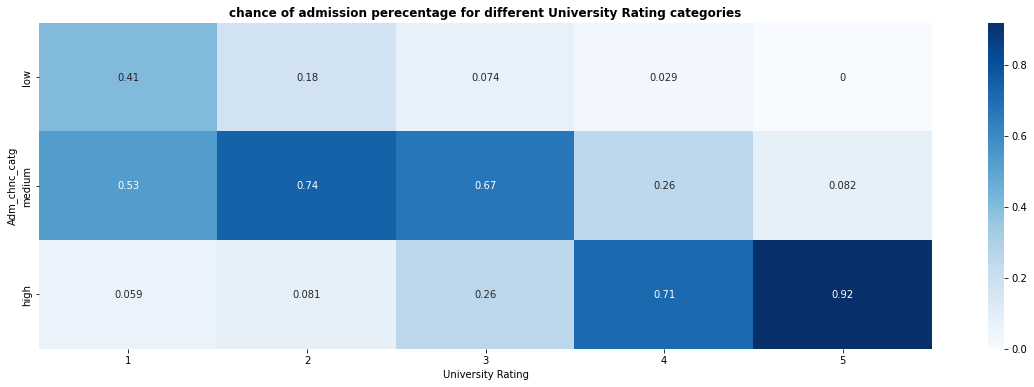

In [ ]:
bins = [0.30,0.53,0.76,1.00]
labels =["low", "medium", "high"]
df['Adm_chnc_catg'] = pd.cut(df['Chance of Admit '], bins, labels=labels)
plt.figure(figsize = (20,6))
sns.heatmap(pd.crosstab(index=df['Adm_chnc_catg'], columns=[df['University Rating']],normalize = 'columns'), annot= True, cmap='Blues')
plt.title('chance of admission perecentage for different University Rating categories',fontweight="bold")
plt.show()

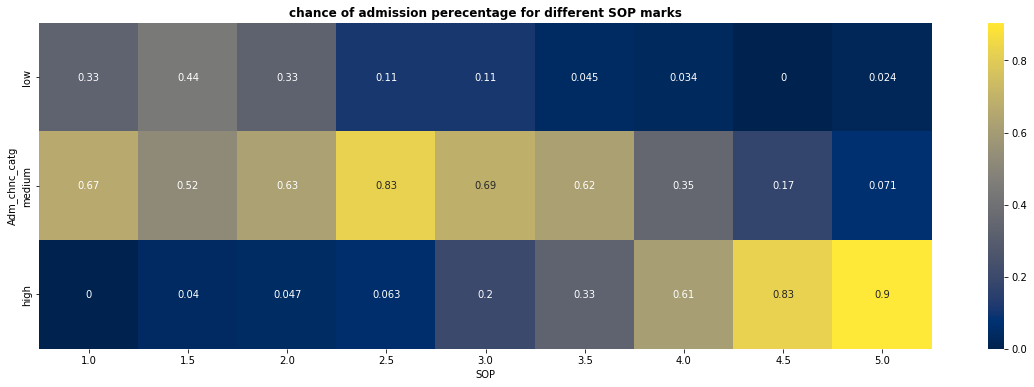

In [ ]:
plt.figure(figsize = (20,6))
sns.heatmap(pd.crosstab(index=df['Adm_chnc_catg'], columns=[df['SOP']],normalize = 'columns'), annot= True, cmap='cividis')
plt.title('chance of admission perecentage for different SOP marks',fontweight="bold")
plt.show()

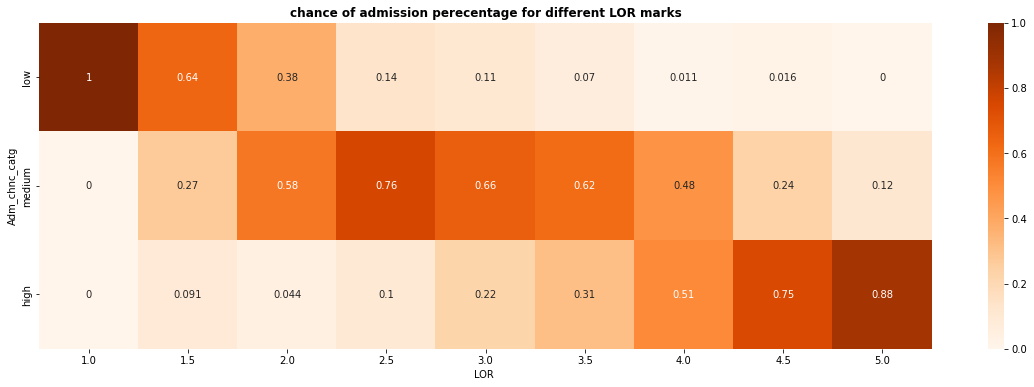

In [ ]:
plt.figure(figsize = (20,6))
sns.heatmap(pd.crosstab(index=df['Adm_chnc_catg'], columns=[df['LOR ']],normalize = 'columns'), annot= True, cmap='Oranges')
plt.title('chance of admission perecentage for different LOR marks',fontweight="bold")
plt.show()

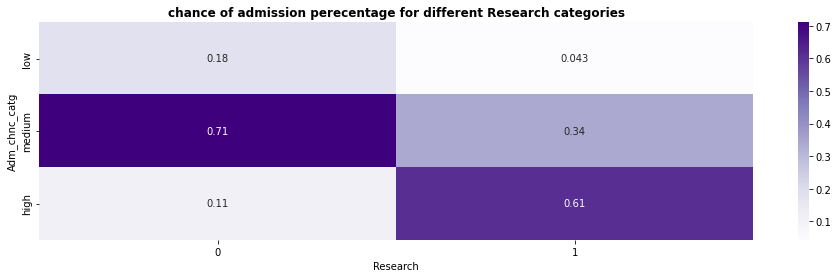

In [ ]:
plt.figure(figsize = (16,4))
sns.heatmap(pd.crosstab(index=df['Adm_chnc_catg'], columns=[df['Research']],normalize = 'columns'), annot= True, cmap='Purples')
plt.title('chance of admission perecentage for different Research categories',fontweight="bold")
plt.show()

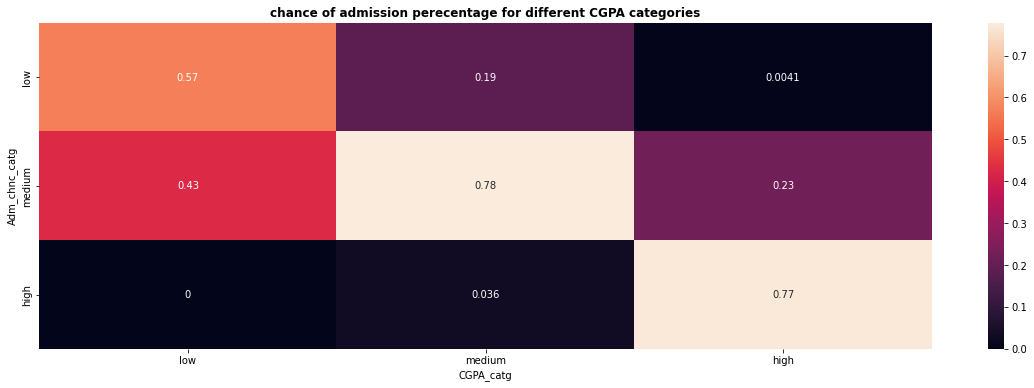

In [ ]:
plt.figure(figsize = (20,6))
sns.heatmap(pd.crosstab(index=df['Adm_chnc_catg'], columns=[df['CGPA_catg']],normalize = 'columns'), annot= True)
plt.title('chance of admission perecentage for different CGPA categories',fontweight="bold")
plt.show()

##```Observations:```

---

1. **Research** - People with **research have a higher chance of admission (78%)** as compared to people with no reearch (63%).
2. People with a **high GRE score had 84% chance** of admission, medium GRE score has 66% chance in admission and low GRE score has 53% chance in admission.
3. People with a **high TOEFL score had 86% chance** of admission, medium GRE score has 69% chance in admission and low GRE score has 55% chance in admission.
4. People with a **high** **CGPA score** **had 82% chance** of admission, medium GRE score has 62% chance in admission and low GRE score has 49% chance in admission.

***Impact of following features on Chance of admission:***

1. **GRE Scores** - Students with good GRE score has a mean admission chance percentage of 88%, medium score students 68% and low score students 55%.
3. **TOEFL Scores** - Students with good TOEFL score has a mean admission chance percentage of 83%, medium score students 63% and low score students 48%.
4. **University Rating** -
  * Among students with **good University rating, 92% has a high chance of admission**, 8% has a medium chance of admission , while **only 0% has a low chance of admission**. 
  * Among students with **medium University rating, 26% has a high chance of admission**, **67% has a medium chance of admission** , while only 7% has a low chance of admission.
  * Among students with **low University rating, 5% has a high chance of admission**, 53% has a medium chance of admission , while only 41% has a low chance of admission.

5. **Statement of Purpose** - 
  * Among students with **good SOP marks (4.0 and above), 83% having LOR of 5 has a high chance of admission**, 17% has a medium chance of admission , while **only 0% has a low chance of admission**. 
  * Among students with **medium SOP marks (2.5 - 4.0), 20% has a high chance of admission**, **69% has a medium chance of admission** , while only 11% has a low chance of admission.
  * Among students with **low SOP marks (less than 2.5), 4% has a high chance of admission**, 52% has a medium chance of admission , while only 44% has a low chance of admission.

5. **Letter of Recommendation Strength** -
  * Among students with **good LOR marks (4.0 and above), 88% having LOR of 5 has a high chance of admission**, 24% has a medium chance of admission , while **only 1.6% has a low chance of admission**. 
  * Among students with **medium LOR marks (2.5 - 4.0), 21% has a high chance of admission**, **67% has a medium chance of admission** , while only 11% has a low chance of admission.
  * Among students with **low LOR marks (less than 2.5), 0.09% has a high chance of admission**, 21% has a medium chance of admission , while only 64% has a low chance of admission.

6. **Undergraduate GPA** -
  * Among students with **good CGPA, 77% has a high chance of admission**, 23% has a medium chance of admission , while **only 0.004% has a low chance of admission**. 
  * Among students with **medium CGPA, 0.03% has a high chance of admission**, **78% has a medium chance of admission** , while only 19% has a low chance of admission.
  * Among students with **low CGPA, 0% has a high chance of admission**, 43% has a medium chance of admission , while only 57% has a low chance of admission.

7. **Research Experience** - 
  * Among students with research experience, 61% has a high chance of admission, 34% has a medium chance of admission , while only 0.05% has a low chance of admission. 
  * Among students with no research experience only 11% has a high chance of admission, 71% has a medium chance of admission , while only 18% has a low chance of admission.




## **Multivariate Analysis**

---




In [ ]:
df_c = df.copy()
df_c['CGPA_catg']= np.where((df_c['CGPA_catg']== 'low') , 0, np.where((df_c['CGPA_catg']== 'medium') , 1, 2))

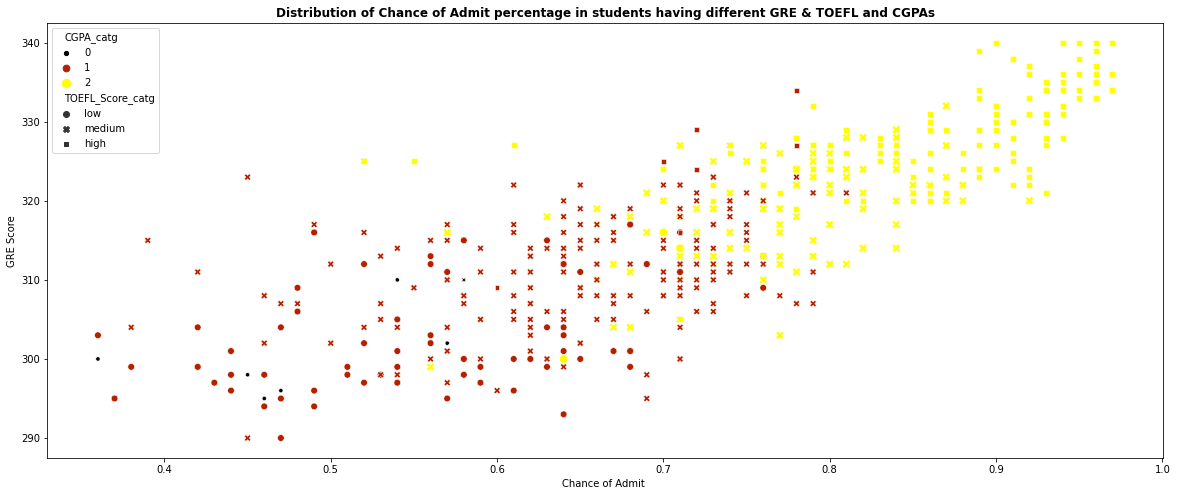

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(data=df_c, x="Chance of Admit ", y="GRE Score", hue="CGPA_catg", style="TOEFL_Score_catg", size = "CGPA_catg",  palette='gnuplot')
plt.title('Distribution of Chance of Admit percentage in students having different GRE & TOEFL and CGPAs',fontweight="bold")
plt.show()

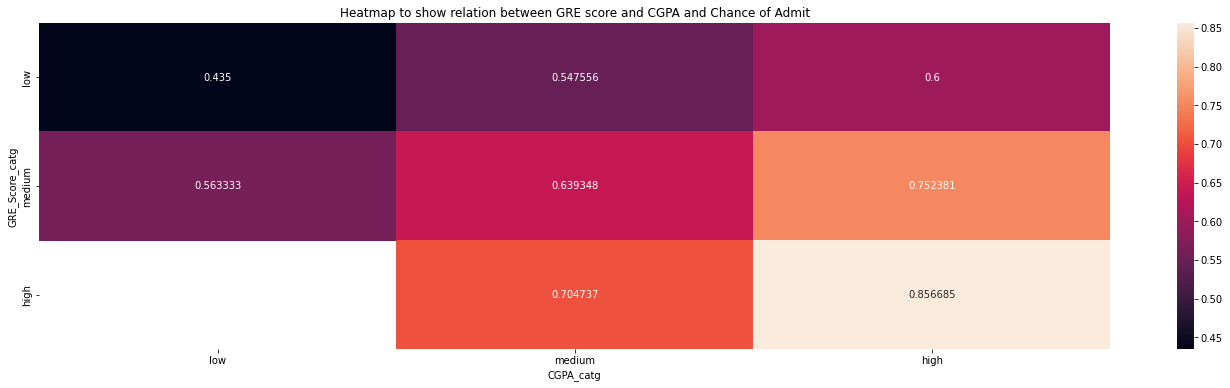

In [ ]:
ymw_count=df.groupby(['GRE_Score_catg','CGPA_catg'])['Chance of Admit '].mean()
data=ymw_count.unstack(level=1)
plt.figure(figsize=(24,6))
sns.heatmap(data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between GRE score and CGPA and Chance of Admit')
plt.show()

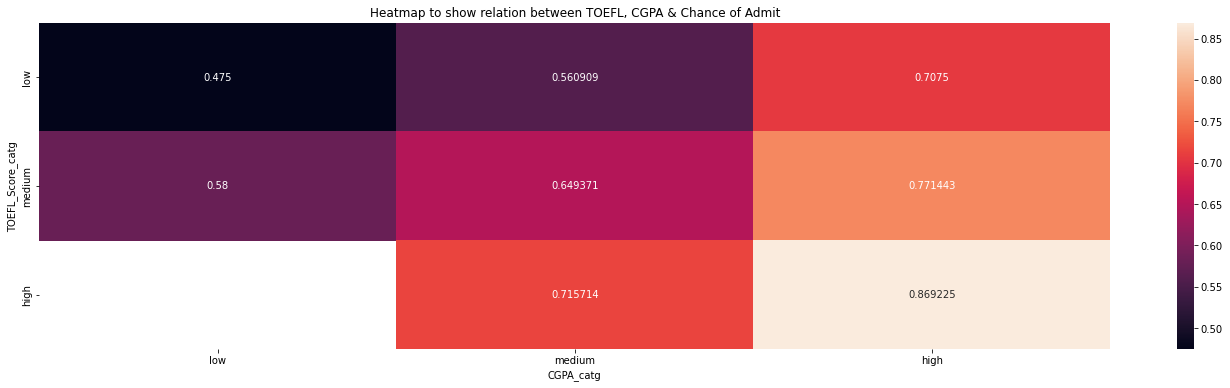

In [ ]:
ymw_count=df.groupby(['TOEFL_Score_catg','CGPA_catg'])['Chance of Admit '].mean()
data=ymw_count.unstack(level=1)
plt.figure(figsize=(24,6))
sns.heatmap(data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between TOEFL, CGPA & Chance of Admit')
plt.show()

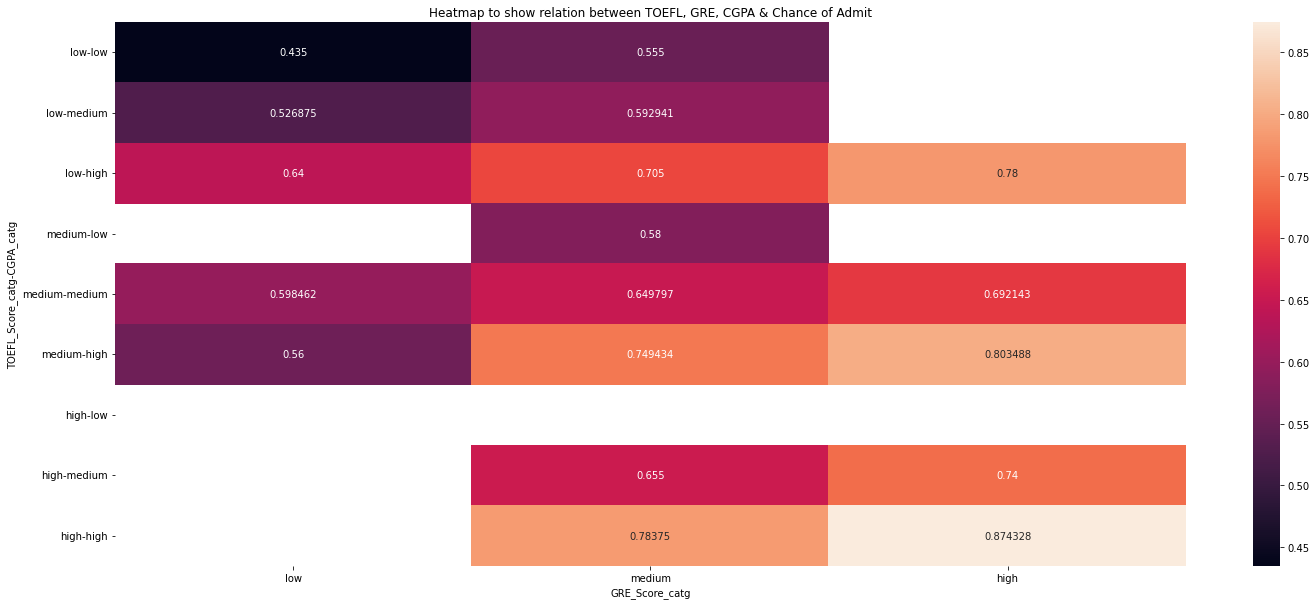

In [ ]:
ymw_count=df.groupby(['TOEFL_Score_catg','GRE_Score_catg',"CGPA_catg"])['Chance of Admit '].mean()
data=ymw_count.unstack(level=1)
plt.figure(figsize=(24,10))
sns.heatmap(data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between TOEFL, GRE, CGPA & Chance of Admit')
plt.show()

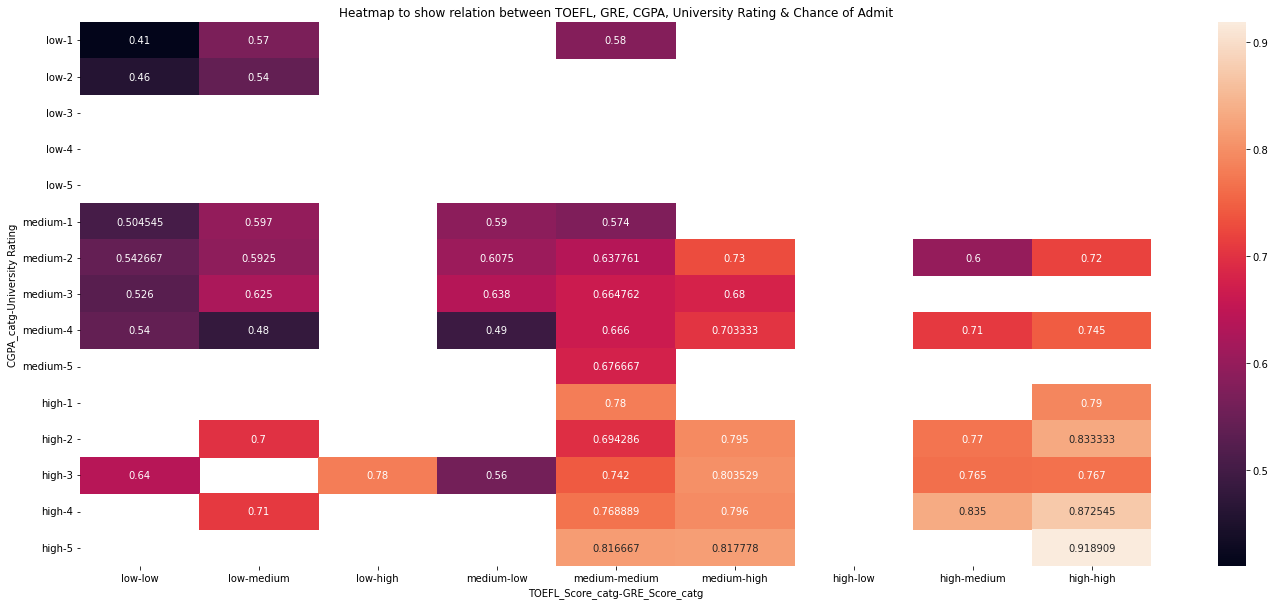

In [ ]:
ymw_count=df.groupby(['TOEFL_Score_catg','GRE_Score_catg',"CGPA_catg",'University Rating'])['Chance of Admit '].mean()
data=ymw_count.unstack(level=[0,1])
plt.figure(figsize=(24,10))
sns.heatmap(data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between TOEFL, GRE, CGPA, University Rating & Chance of Admit')
plt.show()

##```Observations:```

---

***Impact of TOEFL, GRE, CGPA, university Rating on chance of admit:***
There is a clear difference of chance of admit between students with deifferent TOEFL, GRE, CGPA scores and univeristy ratings.

1. For **university Rating 1**: 
  * **For low CGPA, TOEFL & GRE.** - chance of admit is 41%
  * **For low CGPA, TOEFL &  medium GRE.** - chance of admit is 57%
  * **For low CGPA, medium TOEFL &  GRE.** - chance of admit is 58%
  * **For medium CGPA, low TOEFL &  GRE.** - chance of admit is 50%
  * **For medium CGPA &  GRE, low TOEFL.** - chance of admit is 59%
  * **For medium CGPA &  TOEFL, low GRE.** - chance of admit is 59%
  * **For medium CGPA, GRE & TOEFL.** - chance of admit is 57%
  * **For high CGPA & medium  GRE & TOEFL.** - chance of admit is 78%
  * **For high CGPA,  GRE & TOEFL.** - chance of admit is 79%

3. For **university Rating 2**: 
  * **For low CGPA, TOEFL & GRE.** - chance of admit is 46%
  * **For low CGPA, TOEFL &  medium GRE.** - chance of admit is 54%
  * **For medium CGPA & TOEFL & low GRE.** - chance of admit is 60%
  * **For low CGPA, medium TOEFL &  GRE.** - chance of admit is 63%
  * **For medium CGPA, high TOEFL &  GRE.** - chance of admit is 73%
  * **For medium CGPA &  GRE, high TOEFL.** - chance of admit is 72%
  * **For medium CGPA &  TOEFL, low GRE.** - chance of admit is 59%
  * **For medium CGPA, GRE & TOEFL.** - chance of admit is 57%
  * **For high CGPA & medium  GRE & TOEFL.** - chance of admit is 79%
  * **For high CGPA,  GRE & TOEFL.** - chance of admit is 83%

4. For **university Rating 3**: 
  * **For medium CGPA, TOEFL & GRE.** - chance of admit is 52%
  * **For medium CGPA, TOEFL &  low GRE.** - chance of admit is 62%
  * **For medium CGPA & TOEFL & low GRE.** - chance of admit is 60%
  * **For medium CGPA, low TOEFL &  GRE.** - chance of admit is 63%
  * **For medium CGPA, high TOEFL &  GRE.** - chance of admit is 66%
  * **For medium CGPA &  GRE, high TOEFL.** - chance of admit is 68%
  * **For high CGPA & low TOEFL, medium GRE.** - chance of admit is 64%
  * **For high CGPA, low GRE & TOEFL.** - chance of admit is 78%
  * **For high CGPA & medium  GRE & TOEFL.** - chance of admit is 80%
  * **For high CGPA,  GRE & TOEFL.** - chance of admit is 76%

5. For **university Rating 4**: 
  * **For medium CGPA, TOEFL & GRE.** - chance of admit is 66%
  * **For medium CGPA, TOEFL &  low GRE.** - chance of admit is 49%
  * **For medium CGPA & TOEFL & low GRE.** - chance of admit is 54%
  * **For medium CGPA, low TOEFL &  GRE.** - chance of admit is 48%
  * **For medium CGPA, high TOEFL &  GRE.** - chance of admit is 66%
  * **For high CGPA &  GRE, high TOEFL.** - chance of admit is 72%
  * **For high CGPA & low TOEFL, medium GRE.** - chance of admit is 83%
  * **For high CGPA, low GRE & TOEFL.** - chance of admit is 64%
  * **For high CGPA & medium  GRE & TOEFL.** - chance of admit is 78%
  * **For high CGPA,  GRE & TOEFL.** - chance of admit is 87%

6. For **university Rating 5**: 
  * **For high CGPA, medium TOEFL & GRE.** - chance of admit is 67%
  * **For high CGPA, medium TOEFL &  high GRE.** - chance of admit is 81%
  * **For high CGPA & medium GRE & high TOEFL.** - chance of admit is 81%
  * **For high CGPA,  GRE & TOEFL.** - chance of admit is 91%



# **Data Pre-processing**

---



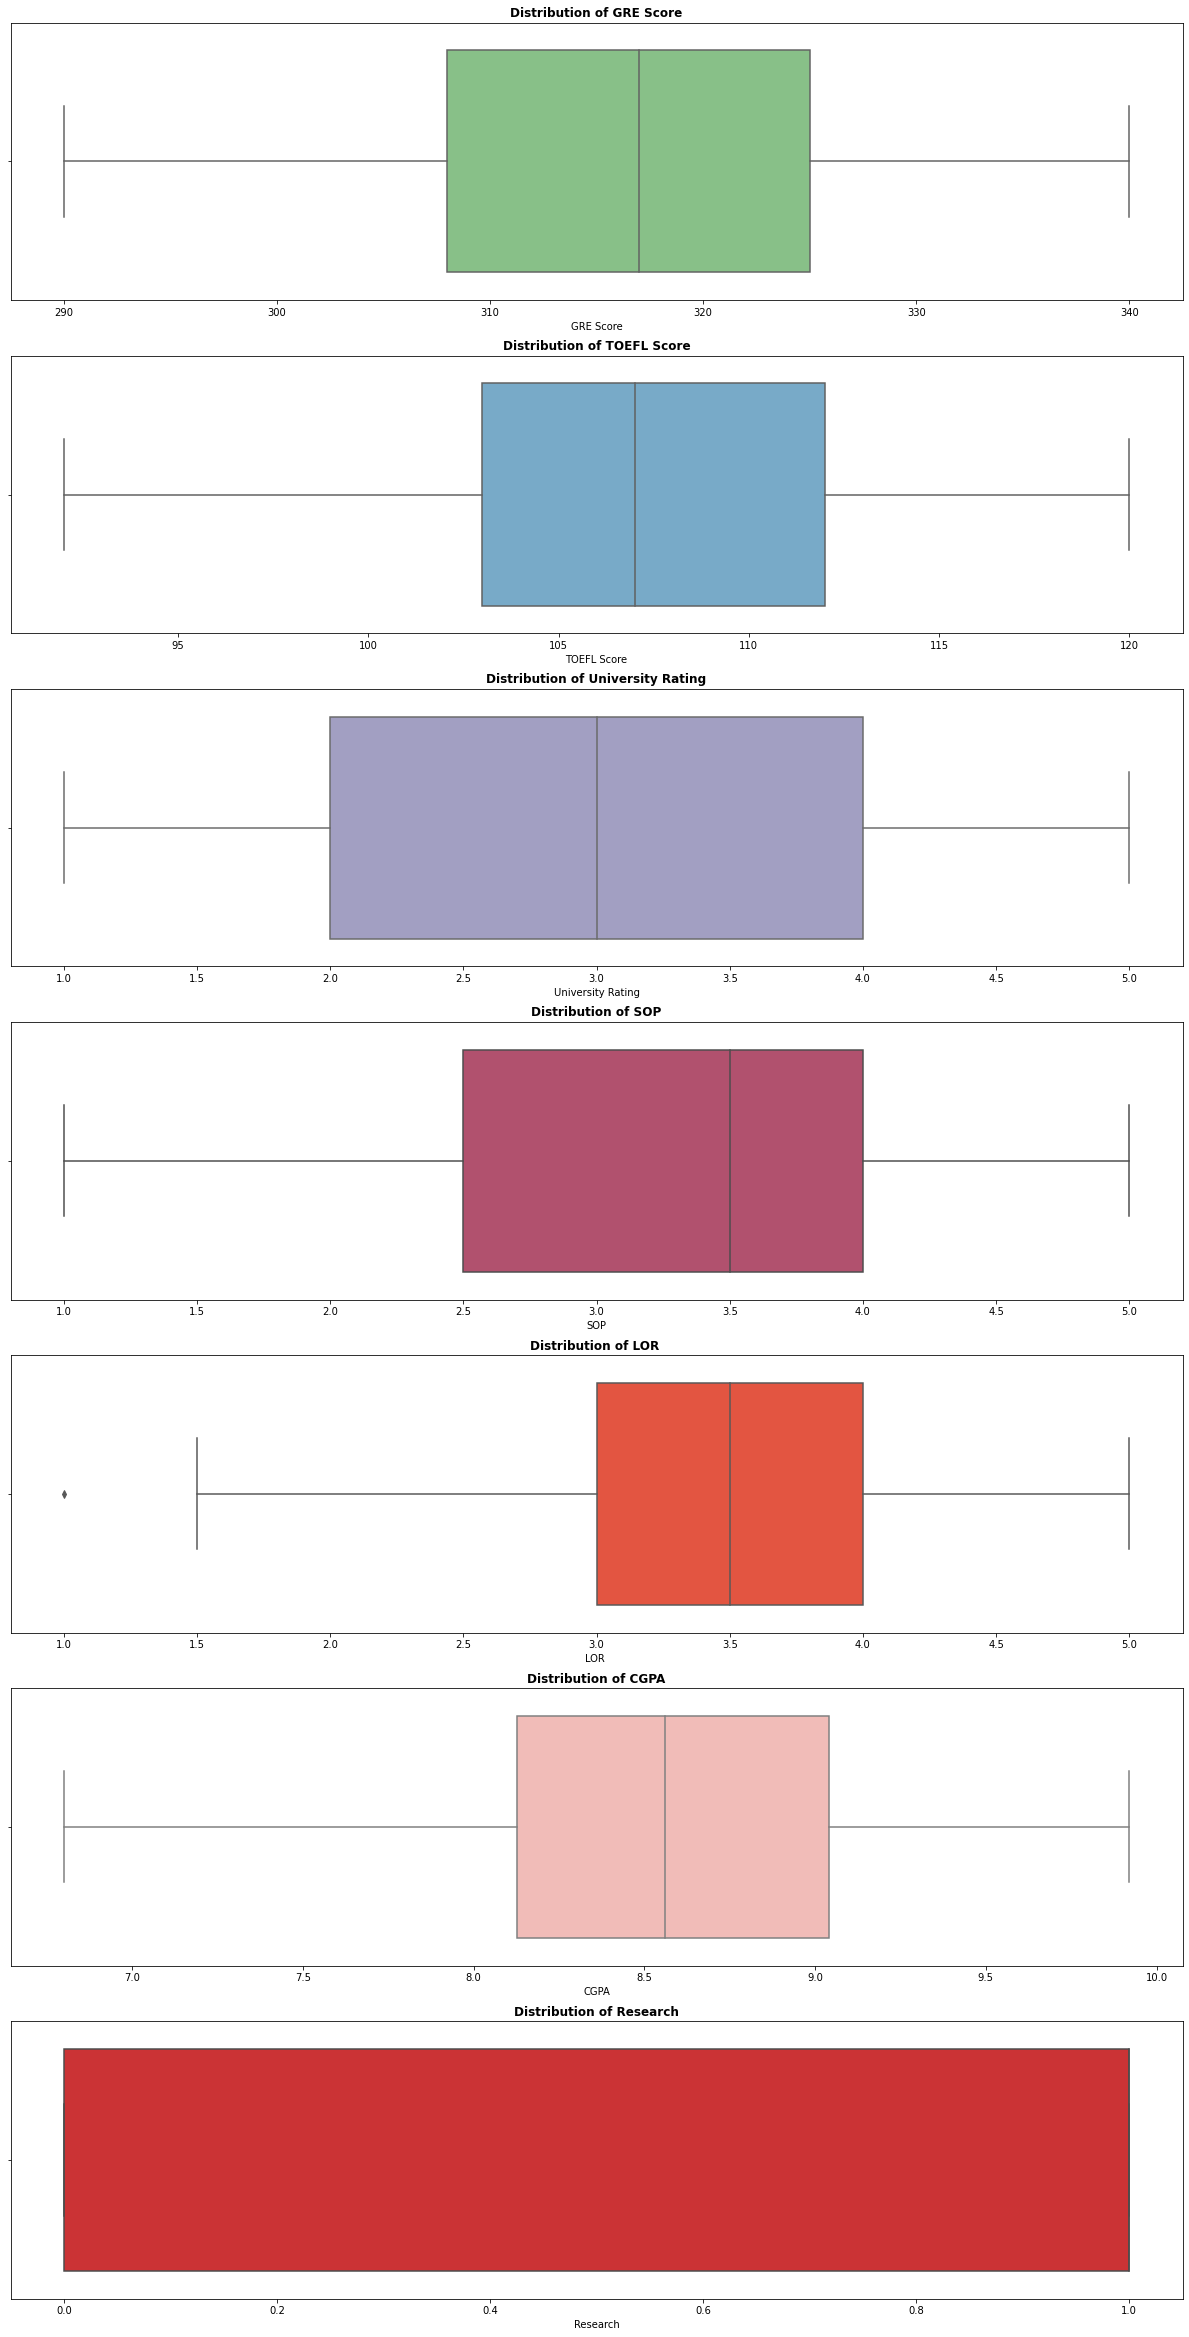

In [ ]:
plt.figure(figsize = (21,48))
p=['Accent', 'Blues', 'Purples','flare', 'CMRmap', 'Pastel1', 'Set1', 'Reds', 'gist_earth','gnuplot']
v_list =['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']
for i in range(len(v_list)):
  plt.subplot(8,1,i+1)
  sns.boxplot(data=df_lr, x=v_list[i], palette=p[i])
  plt.title(f"Distribution of {v_list[i]}",fontweight="bold")

Text(0.5, 1.0, 'Distribution of Chance of Admit')

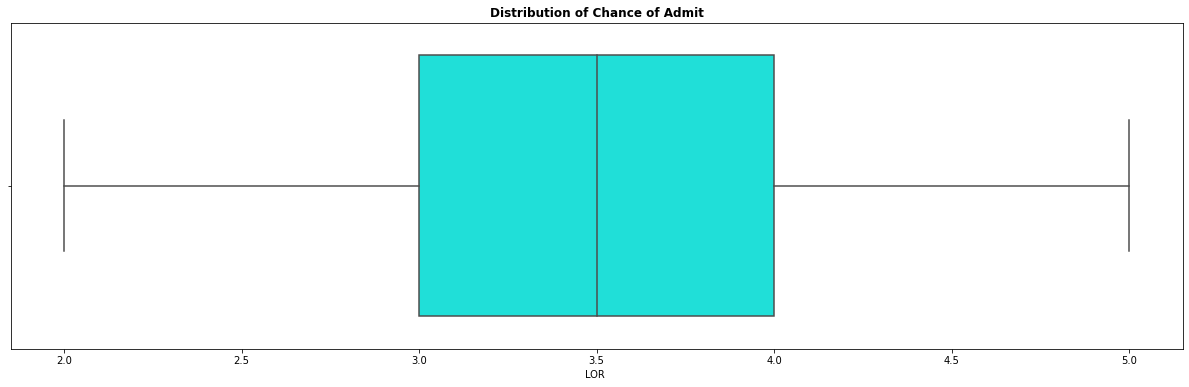

In [ ]:
plt.figure(figsize = (21,6))

Q3 = df['LOR '].quantile(0.75)
Q1 = df['LOR '].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
df_lr = df_lr[(df_lr['LOR ']>lower) & (df_lr['LOR ']<upper)]


# plt.subplot(6,2,i+1)
sns.boxplot(data=df_lr, x='LOR ', palette='hsv')
plt.title(f"Distribution of Chance of Admit",fontweight="bold")

In [ ]:
df_lr.shape

(488, 8)

## **Data Standardization**

---


While performing regression analysis, we need to standardize the independent variables. These terms provide crucial information about the relationships between the independent variables and the dependent variable, but they also generate high amounts of **multicollinearity**.

Multicollinearity refers to independent variables that are correlated. This problem can obscure the statistical significance of model terms, produce imprecise coefficients, and make it more difficult to choose the correct model. Thus we will standardize the data.



In [ ]:
# Applying Standard scaler on the following columns
std = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']
x= df_lr[std].values
scaler = StandardScaler()
std_data = scaler.fit_transform(x)
std_data = pd.DataFrame(std_data, columns=std,index = df_lr.index )
df_lr[std] = std_data
df_lr.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.810473,1.776587,0.753395,1.121061,1.099711,1.763197,0.872773,0.92
1,0.648664,-0.061285,0.753395,0.609295,1.099711,0.463287,0.872773,0.76
2,-0.066295,-0.562523,-0.134665,-0.414237,-0.038484,-0.986612,0.872773,0.72
3,0.469924,0.439953,-0.134665,0.097529,-1.176679,0.129977,0.872773,0.80
4,-0.245035,-0.729602,-1.022725,-1.437768,-0.607582,-0.636636,-1.145773,0.65


Collinearity

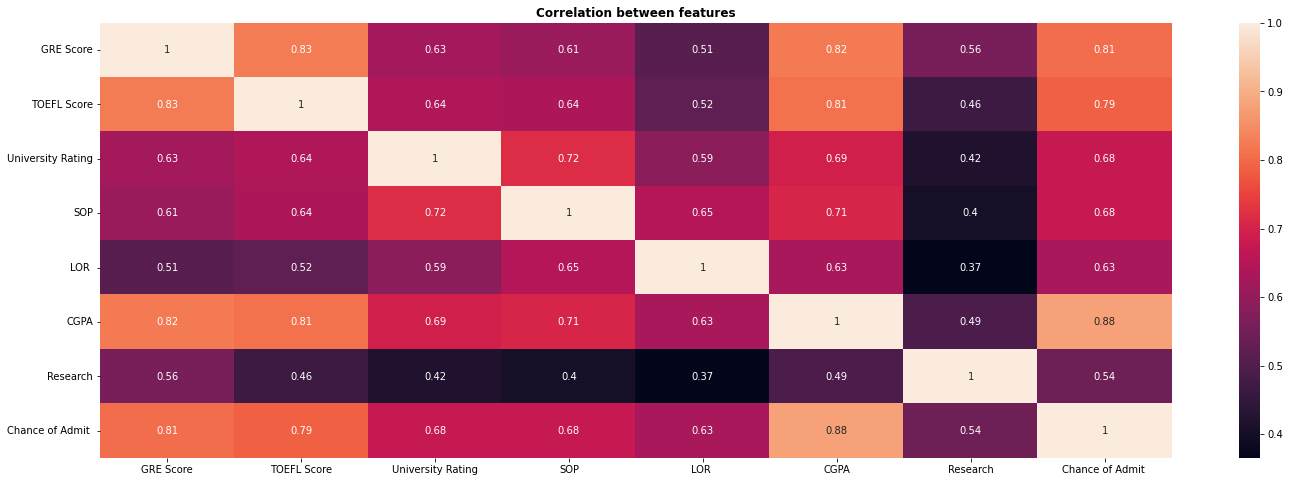

In [ ]:
plt.figure(figsize = (24,8))
sns.heatmap(df_lr.corr(), annot=True)
plt.title('Correlation between features',fontweight="bold")
plt.show()

  * we can see that GRE , TOEFL and CGPA are highly correlated to each other. all having a correlation greater than 0.80.
  * this will result in multi collinearity. So we will calculate the VIF scores and drop these columns if VIF scoreare similar.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = df_lr.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,GRE Score,4.390286
1,TOEFL Score,3.880046
2,University Rating,2.510515
3,SOP,2.759259
4,LOR,1.965030
5,CGPA,4.727590
6,Research,1.486005


The features GRE score, TOEFL Score and CGPA are highly correlated. So calculating the VIF score with only CGPA out of these 3 features.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = df_lr.iloc[:,2:-1]
calc_vif(X)

,variables,VIF
0,University Rating,2.466366
1,SOP,2.734822
2,LOR,1.954348
3,CGPA,2.671396
4,Research,1.345964


VIF scores have decreased for all features.

##```Build the Linear Regression model and comment on the model statistics:```

---

In [ ]:
features = ['University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']                
target = ['Chance of Admit ']  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lr[features], df_lr[target], test_size=0.10, random_state=5000)

print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (439, 5)
y_train shape:  (439, 1)

Test cases as below
X_test shape:  (49, 5)
y_test shape:  (49, 1)


In [ ]:
# LinearRegression
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(y_train.squeeze().tolist(), X_sm)
sm_model_linear = sm_model.fit()
print(sm_model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     349.7
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          1.61e-149
Time:                        12:21:58   Log-Likelihood:                 607.87
No. Observations:                 439   AIC:                            -1204.
Df Residuals:                     433   BIC:                            -1179.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7270      0.00

**Linear regression in scikit-learn** -

*To apply any machine learning algorithm on your dataset, basically there are 4 steps:*

1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Evaluate - Calculate RMSE and R square


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)
print('Intercept:',lr_model.intercept_)          
print('Coefficients:',lr_model.coef_) 

Intercept: [0.72700431]
Coefficients: [[0.0105896  0.00428396 0.01416723 0.09281672 0.01787701]]


In [ ]:
train_score_lr = lr_model.score(X_train, y_train)
test_score_lr = lr_model.score(X_test, y_test)
# valid_score_lr = lr_model.score(X_valid, y_valid)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))
# print("The valid score for lr model is {}".format(valid_score_lr))

The train score for lr model is 0.8014977434321633
The test score for lr model is 0.7993851333766531


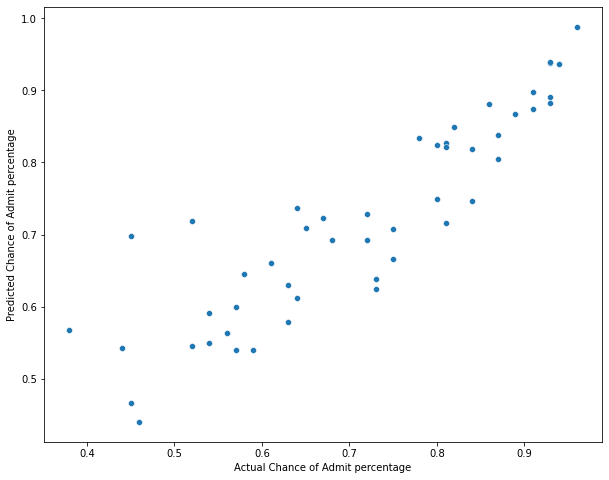

In [ ]:
y_pred_train = lr_model.predict(X_train)  
y_pred_test = lr_model.predict(X_test)   
fig,ax = plt.subplots(figsize=(10,8))
a= np.array(y_test)
a = np.reshape(a,(49,))
b = np.reshape(y_pred_test,(49,))
sns.scatterplot(a,b,ax=ax);
ax.set_xlabel("Actual Chance of Admit percentage");
ax.set_ylabel("Predicted Chance of Admit percentage");

##```Observations:```

---



1.   We can see the R2 and adjusted R2 score is same for both the models (sklearn and statsmodel).
2.   R2- The test score for lr model is 0.8014977434321633

      Adjusted R2- The test score for lr model is 0.7993851333766531



##```Display model coefficients with column names:```

---

In [ ]:
pd.DataFrame((lr_model.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
CGPA,0.092817
Research,0.017877
LOR,0.014167
University Rating,0.010590
SOP,0.004284


##```Try out Ridge and Lasso regression:```

---

**Ridge and Lasso regression** are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:

1. Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
2. Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features

These regression work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

***Ridge Regression:***
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of square of coefficients)

***Lasso Regression:***
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.8010329042829074
The test score for ridge model is 0.7944963415406616


In [ ]:
pd.DataFrame((ridgeReg.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
CGPA,0.088051
Research,0.018345
LOR,0.014786
University Rating,0.011725
SOP,0.006107


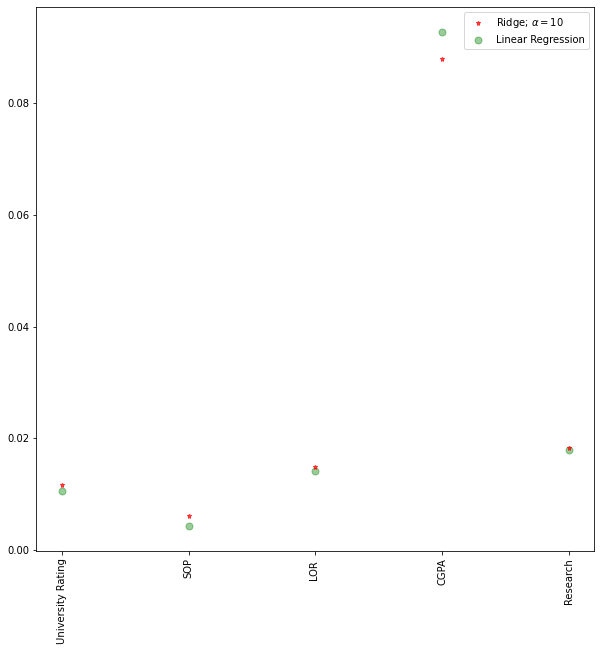

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(features,np.reshape(ridgeReg.coef_,(5,)),alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(features,np.reshape(lr_model.coef_,(5,)),alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

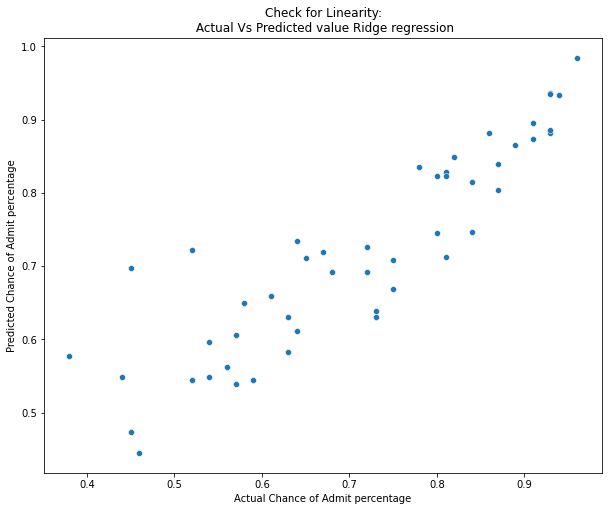

In [ ]:
y_pred_train_RR = ridgeReg.predict(X_train)  
y_pred_test_RR = ridgeReg.predict(X_test)   
fig,ax = plt.subplots(figsize=(10,8))
b1 = np.reshape(y_pred_test_RR,(49,))
sns.scatterplot(a,b1,ax=ax);
ax.set_xlabel("Actual Chance of Admit percentage");
ax.set_ylabel("Predicted Chance of Admit percentage");
ax.set_title('Check for Linearity:\n Actual Vs Predicted value Ridge regression')
plt.show()

In [ ]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model............................................

The train score for ls model is 0.8014094557546546
The test score for ls model is 0.799432084431628


In [ ]:
lasso.coef_

array([0.01026803, 0.00410373, 0.01373785, 0.09270342, 0.01728584])

In [ ]:
pd.DataFrame((lasso.coef_).T,index=X_train.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
CGPA,0.092703
Research,0.017286
LOR,0.013738
University Rating,0.010268
SOP,0.004104


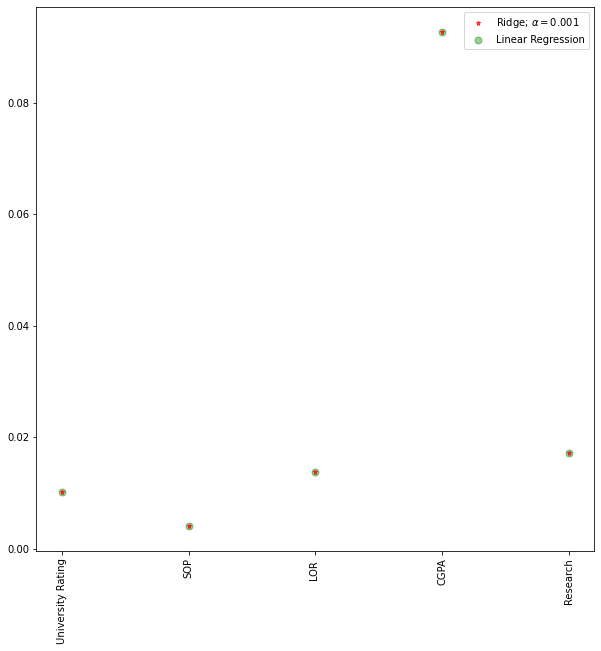

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(features,np.reshape(lasso.coef_,(5,)),alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.001$',zorder=7)
plt.plot(features,np.reshape(lasso.coef_,(5,)),alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

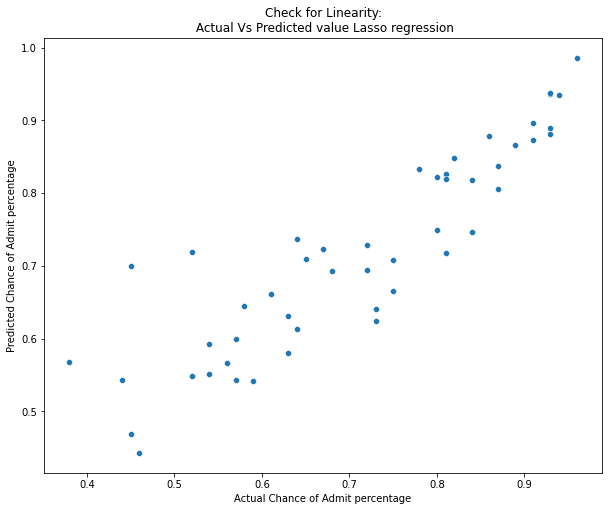

In [ ]:
y_pred_train_LS = lasso.predict(X_train)  
y_pred_test_LS= lasso.predict(X_test)   
fig,ax = plt.subplots(figsize=(10,8))
b2 = np.reshape(y_pred_test_LS,(49,))
sns.scatterplot(a,b2,ax=ax);
ax.set_xlabel("Actual Chance of Admit percentage");
ax.set_ylabel("Predicted Chance of Admit percentage");
ax.set_title('Check for Linearity:\n Actual Vs Predicted value Lasso regression')
plt.show()

##```Observations:```

---


A) For Ridge Model:

1. The train score for ridge model is 0.8010329042829074
2. The test score for ridge model is 0.7944963415406616

B) For Lasso Model:

1. The train score for ls model is 0.8014094557546546
2. The test score for ls model is 0.799432084431628

***Both the models give almost similar results for model efficiency.***

# **Testing the assumptions of the linear regression model**

---

Model Validation
In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

1. Linear regession assumes that there is little or **no Multicollinearity** in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation. If VIF >1 & **VIF <5** moderate correlation, VIF > 5 critical level of multicollinearity. 
2. **The mean of residual error should be 0 or close to 0** as much as possible
The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
3. **Linear Relationship**: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
4. Homoscedasticity: **The data are homoscedastic meaning the residuals are equal across the regression line**. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.
5. The **residual error plot should be normally distributed**.


##```Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5):```

---

In [ ]:
VIF = 1/(1- test_score_lr)
VIF

4.984675447196509

##```Observations:```

---
As we have already dropped 2 features the VIF score is under 5. Else it would have been greater than 5.

##```The mean of residuals is nearly zero :```

---

In [ ]:
(a - b).mean()

-0.007716401274464808

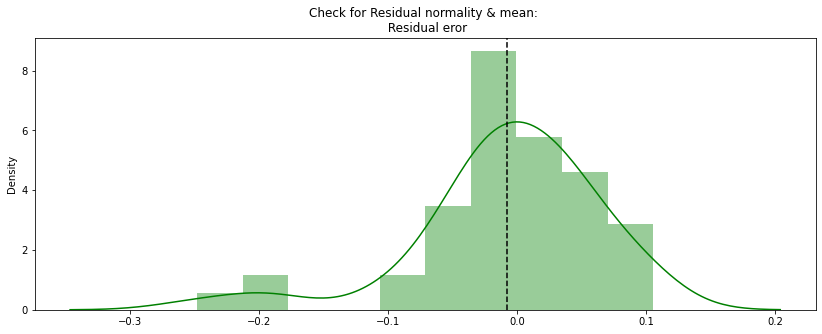

In [ ]:
# Check for Residual normality & mean
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(111)
sns.distplot((a - b),ax=ax,color='g')
ax.axvline((a - b).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

##```Observations:```

---

1. The mean of residual error is -0.07, which is very close to 0.
2. the residual is normally distributed as visible in the graph.

##```Linearity of variables (no pattern in the residual plot):```

---

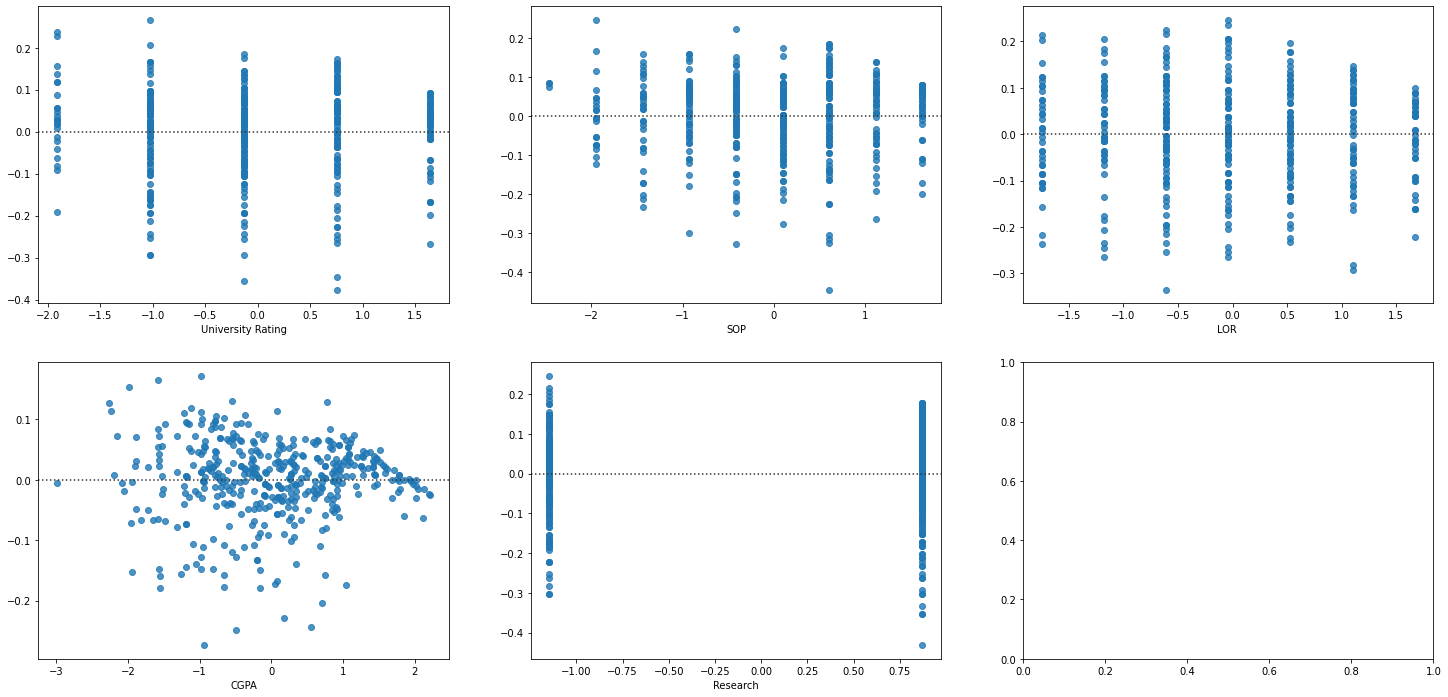

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(25, 12))
axes = ax.ravel()

ftr = X_train.columns
tgt = y_train.squeeze().tolist()

for index, var in enumerate(ftr):
  sns.residplot(data=X_train, x=var, y=tgt, ax=axes[index])

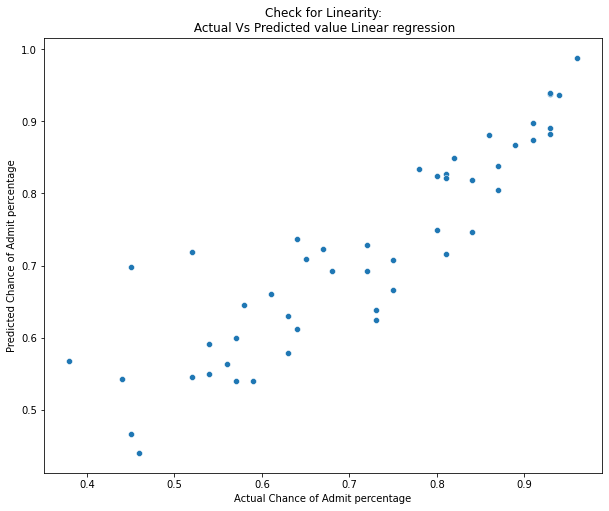

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(a,b,ax=ax);
ax.set_xlabel("Actual Chance of Admit percentage");
ax.set_ylabel("Predicted Chance of Admit percentage");
ax.set_title('Check for Linearity:\n Actual Vs Predicted value Linear regression')
plt.show()

##```Test for Homoscedasticity:```

---

**Homoscedasticity**: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

Performing Levene's test to test for Homoscedasticity.

**H0**: population variances are equal (called homogeneity of variance or homoscedasticity).

**HA**: population variances are different

**p-value** = 0.05


In [ ]:
from scipy.stats import levene
stat,p = levene(a,b)
print('P-value :',(p))

P-value : 0.1654391960137639


***Levene Test Result:*** P - value is very higher than 0.05. so we fail to reject H0. The variance is similar.

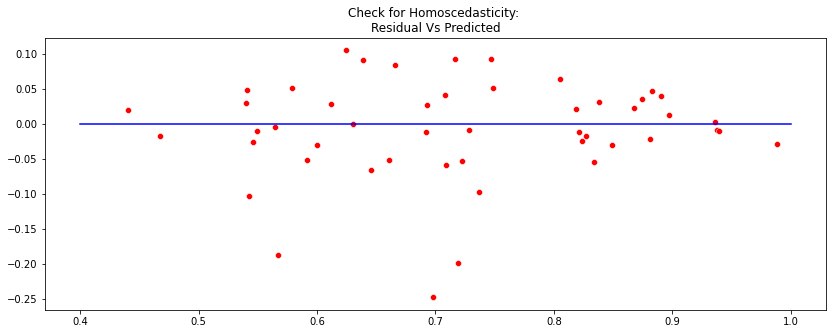

In [ ]:
plt.figure(figsize=(14,5))
sns.scatterplot(y = (a - b), x= b,color='r') 
sns.lineplot([0.4,1],[0,0],color='blue')
plt.title('Check for Homoscedasticity: \nResidual Vs Predicted');

##```Observations:```

---

The residuals are equally distributed along the line as displayed in the plot. Thus we can conclude the data is homoscedastic.

##```Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line:```

---

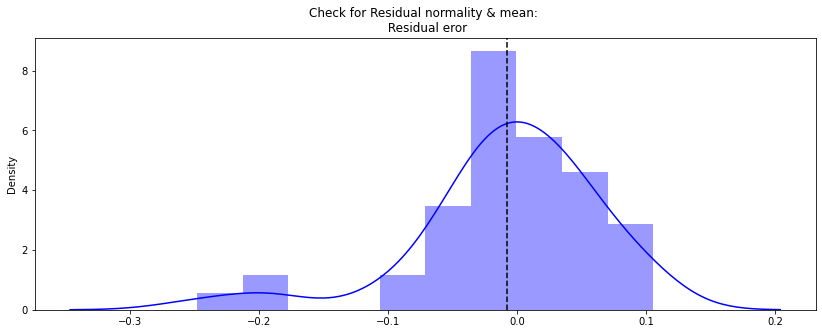

In [ ]:
# Check for Residual normality & mean
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(111)
sns.distplot((a - b),ax=ax,color='b')
ax.axvline((a - b).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Text(0.5, 1.0, 'Check for Multivariate Normality: \nQ-Q Plot')

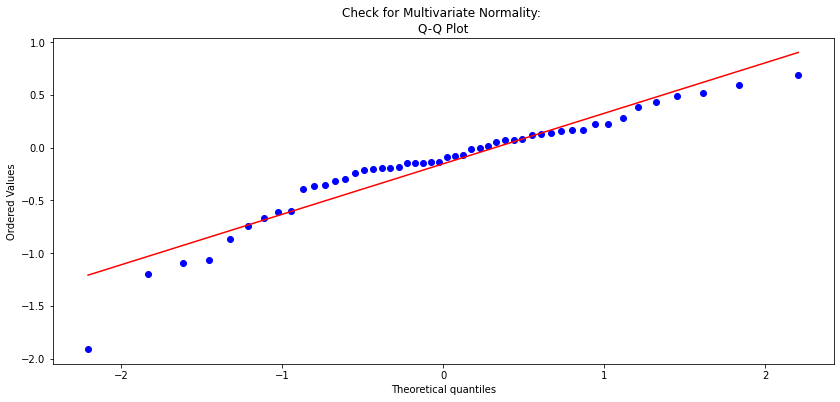

In [ ]:
f,ax = plt.subplots(1,1,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((a - b),fit=True,plot=ax)
ax.set_title('Check for Multivariate Normality: \nQ-Q Plot')

##```Observations:```

---
.
The residual is normally distributed as visible in the plot and by the QQ plot.

# **Model performance evaluation**

---



##```Metrics checked - MAE, RMSE, R2, Adj R2 - Train and test performances are checked:```

---

In [ ]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.04354534778983975
MAE for test set is 0.05038806702124722


In [ ]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.003671199021560667
MSE for test set is 0.005064134196263136


In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.06059042021277511
RMSE for test set is 0.07116273038791539


In [ ]:
print("R2- The train score for lr model is {}".format(train_score_lr))
print("R2- The test score for lr model is {}".format(test_score_lr))

R2- The train score for lr model is 0.8014977434321633
R2- The test score for lr model is 0.7993851333766531


In [ ]:
adjr2_sq_test = 1 - ( 1-test_score_lr ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
adjr2_sq_train = 1 - ( 1-train_score_lr ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )

print("Adjusted R2- The train score for lr model is {}".format(adjr2_sq_test))
print("Adjusted R2- The test score for lr model is {}".format(adjr2_sq_train))

Adjusted R2- The train score for lr model is 0.7760578233041708
Adjusted R2- The test score for lr model is 0.7992055695687934


##```Comments on the performance measures and if there is any need to improve the model or not:```

---


1. The R2 and adjusted R2 value for test are both around 0.799. This means that **79% of dependent variability can be explained by the model**. Also the value of adjusted R squared is almost same as the value of R squared, which means the model is a **highly robust model**.

  The reason we need to consider Adjusted R squared as well is because while R Square is a good measure to determine how well the model fits the dependent variables, it does not take into consideration of overfitting problem. If the regression model has many independent variables, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

2. MAE - Mean absolute error takes the sum of the absolute value of error. The closer the MAE value is to 0, the more perfect the model is. **Our test set returns a value of 0.05**.

3. MSE - Mean Square Error is an absolute measure of the goodness for the fit. MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives an absolute number on how much the predicted results deviate from the actual number. But, MSE gives larger penalization to big prediction error by square. **For our model MSE is 0.005 which is a very good indicator that our model is working well.**

4. RMSE - Root Mean Square Error is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

    The difference between MAE & RMSE is - MAE is interpreted as the average error when making a prediction with the model. RMSE on the other hand can be interpreted as the average weighted performance of the model, where a larger weight is added to outlier predictions.

    **In our model we have a RMSE value of 0.07 which is a good value for linear regression models.**

5. All the metrics perform equally well for Test and Train data, so we can consider this to be a good model.

# **Business Insights and Recommendations:**

---

1. Features CGPA, TOEFL Score and GRE score has a high correlation among themselves. It appears that a student having a high CGPA will have a high probability of having a good TOEFL and GRE score too. **With every unit increase in CGPA, the chance of admit increases by 0.09 if other factors are constant.**

2. CGPA is the highest driving feature for chance in Admit. so to ensure a higher chance in admit students should increase their CGPA, which will inturn increase TOEFL and GRE scores.

3. Research and LOR also impacts the variability of chance of Admit. Thus when students have better LOR and have done some kind of research in UG it increases the chance of admission. **With every unit increase in LOR, the chance of admit increases by 1.3% and if the student has done research work the the chance of admit increases another 1.7% if other factors are constant.**

4. The rating of the UG univeristy also affect the chance of Admit. **With every unit increase in rating of university, the chance of admit increases by 1% if other factors are constant.**

5. We should also add features such as **extra curricular work, internships and work experience** as those are very critical in calculating chances of admission. 

6. **Personal qualities** is a major factor that needs to be featured in as the interview rounds depend a lot on personal qualities. The faculty wants to see how a student would contribute positively in campus. So to give accurate results of the prediction model we should factor in that feature as well.

